#SVM & Naive Bayes


#**THEORETICAL**

#1. What is a Support Vector Machine (SVM)?
- A Support Vector Machine (SVM) is a powerful and versatile machine learning algorithm used for both classification and regression tasks, though it's primarily used for classification.

 Here's a breakdown of its key concepts:

- Goal: The main objective of an SVM is to find an optimal hyperplane that best separates data points of different classes in a high-dimensional space.
- Hyperplane: In a 2-D space, a hyperplane is a line. In a 3-D space, it's a plane. In higher dimensions, it's a 'hyperplane'. The SVM tries to find the hyperplane that maximizes the margin between the different classes.
- Support Vectors: These are the data points that are closest to the hyperplane. They are the most difficult to classify and play a crucial role in defining the orientation and position of the hyperplane. They 'support' the hyperplane, hence the name.
- Margin: This is the distance between the hyperplane and the nearest data point from either class (the support vectors). A larger margin is generally desirable as it indicates a better generalization capability of the model.
- Kernel Trick: SVMs can handle non-linearly separable data by using the "kernel trick." This involves transforming the input data into a higher-dimensional feature space where a linear separation might be possible. Common kernel functions include polynomial, radial basis function (RBF), and sigmoid.


Advantages of SVMs:

- Effective in high-dimensional spaces.
- Still effective in cases where the number of dimensions is greater than the number of samples.
- Uses a subset of training points in the decision function (support vectors), making it memory efficient.
- Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it's also possible to specify custom kernels.

Disadvantages of SVMs:

- If the number of features is much greater than the number of samples, avoiding over-fitting when choosing kernel functions and regularization term is crucial.
- SVMs don't directly provide probability estimates; these are calculated using an expensive five-fold cross-validation



#2. What is the difference between Hard Margin and Soft Margin SVM?

## Hard Margin SVM vs. Soft Margin SVM

**Hard Margin SVM:**

*   **Goal:** To find a hyperplane that perfectly separates the two classes without any misclassifications.
*   **Applicability:** Only works when the data is linearly separable, meaning a clear line (or hyperplane in higher dimensions) can be drawn to divide the classes without any data points crossing over.
*   **Sensitivity:** Extremely sensitive to outliers. A single outlier on the 'wrong' side can prevent a hard margin from being found or can drastically alter its position.
*   **Robustness:** Less robust to noise and mislabeled data.
*   **Margin:** Maximizes the margin between the closest data points of each class, ensuring no points lie within the margin or on the wrong side.

**Soft Margin SVM:**

*   **Goal:** To find a hyperplane that provides the best possible separation while allowing for some misclassifications or data points to be within the margin. It balances maximizing the margin with minimizing classification errors.
*   **Applicability:** Works well when data is not perfectly linearly separable, which is common in real-world scenarios.
*   **Sensitivity:** Less sensitive to outliers and noise. It introduces a 'slack variable' (ξ, epsilon) and a regularization parameter (C) to control the trade-off between maximizing the margin and minimizing classification errors.
*   **Robustness:** More robust to noise and mislabeled data.
*   **Margin:** Still aims to maximize the margin, but it allows for some data points to violate the margin constraints (either by being within the margin or on the wrong side of the hyperplane). The `C` parameter controls the penalty for these violations:
    *   **Small C:** Allows for a wider margin but more misclassifications.
    *   **Large C:** Penalizes misclassifications more heavily, leading to a narrower margin but fewer errors (can lead to overfitting).

**Key Difference Summary:**

| Feature             | Hard Margin SVM                               | Soft Margin SVM                                              |
| :------------------ | :-------------------------------------------- | :----------------------------------------------------------- |
| **Separability**    | Requires perfectly linearly separable data   | Handles non-linearly separable and noisy data                |
| **Misclassifications** | Not allowed                                   | Allowed (controlled by `C` parameter)                        |
| **Outliers**        | Highly sensitive                              | Less sensitive                                               |
| **Robustness**      | Less robust                                   | More robust                                                  |
| **Complexity**      | Simpler concept, but limited applicability   | More complex with regularization, but widely applicable      |

#3. What is the mathematical intuition behind SVM?

## Mathematical Intuition Behind SVM

The core of SVM's mathematical intuition lies in finding an optimal separating hyperplane that maximizes the margin between different classes. Let's break down the key mathematical concepts:

### 1. The Hyperplane Equation

In a 2D space, a line can be represented as `wx + b = 0`. In a higher-dimensional space, a hyperplane is represented by the equation:

$w^T x + b = 0$

Where:
*   $w$ is the normal vector to the hyperplane. Its direction determines the orientation of the separating plane.
*   $x$ is a point in the feature space.
*   $b$ is the bias (or intercept) term, which determines the offset of the hyperplane from the origin.

For a binary classification problem, we want to classify points such that:
*   $w^T x_i + b \ge +1$ for data points belonging to class 1.
*   $w^T x_i + b \le -1$ for data points belonging to class -1.

The points for which $w^T x + b = +1$ and $w^T x + b = -1$ are called the **support vectors**. These are the closest points to the hyperplane.

### 2. Maximizing the Margin

The margin is the distance between these two parallel hyperplanes ($w^T x + b = +1$ and $w^T x + b = -1$). The distance between these two hyperplanes is given by:

$\text{Margin} = \frac{2}{||w||}$

To maximize the margin, we need to minimize $||w||$. This is equivalent to minimizing $\frac{1}{2}||w||^2$ for mathematical convenience (it's a convex optimization problem, making it easier to solve).

So, the optimization problem for a **Hard Margin SVM** is:

Minimize $\frac{1}{2}||w||^2$
Subject to: $y_i(w^T x_i + b) \ge 1$ for all $i=1, ..., N$

Where $y_i$ is the class label for data point $x_i$ (either +1 or -1).

### 3. Soft Margin SVM and the Slack Variable

Real-world data is rarely perfectly linearly separable. To handle misclassifications and allow some points to lie within the margin or on the wrong side, the **Soft Margin SVM** introduces a **slack variable** ($\xi_i$, epsilon).

$\xi_i \ge 0$

*   If $\xi_i = 0$, the point is correctly classified and outside the margin.
*   If $0 < \xi_i < 1$, the point is correctly classified but within the margin.
*   If $\xi_i \ge 1$, the point is misclassified.

The constraints for Soft Margin SVM become:

$y_i(w^T x_i + b) \ge 1 - \xi_i$

The optimization problem for a Soft Margin SVM is:

Minimize $\frac{1}{2}||w||^2 + C \sum_{i=1}^{N} \xi_i$
Subject to: $y_i(w^T x_i + b) \ge 1 - \xi_i$ and $\xi_i \ge 0$ for all $i=1, ..., N$

Here, $C$ is a regularization parameter:
*   **Small C:** Allows for a wider margin but more violations (larger $\xi_i$), leading to potentially underfit models.
*   **Large C:** Penalizes violations more heavily, leading to a narrower margin but fewer errors, potentially overfitting.

### 4. The Kernel Trick

When data is not linearly separable even in a soft margin context, SVMs employ the **kernel trick**. This involves implicitly mapping the data into a higher-dimensional feature space where a linear separation might be possible.

The dot product $x_i^T x_j$ in the original feature space is replaced by a kernel function $K(x_i, x_j) = \phi(x_i)^T \phi(x_j)$, where $\phi$ is the mapping function to the higher-dimensional space. This avoids the explicit and computationally expensive calculation of $\phi(x)$.

Common kernel functions include:
*   **Linear:** $K(x_i, x_j) = x_i^T x_j$
*   **Polynomial:** $K(x_i, x_j) = (\gamma x_i^T x_j + r)^d$
*   **Radial Basis Function (RBF) / Gaussian:** $K(x_i, x_j) = e^{-\gamma ||x_i - x_j||^2}$

By using the kernel trick, SVM can find non-linear decision boundaries in the original feature space while still solving a linear classification problem in the transformed, higher-dimensional space.

# 4. What is the role of Lagrange Multipliers in SVM?

Lagrange Multipliers play a crucial role in the mathematical formulation of Support Vector Machines (SVMs). They are used to solve constrained optimization problems, which is exactly what an SVM is: maximizing the margin subject to correctly classifying all data points (or minimizing errors in the soft margin case).

Here's how they are applied:

1.  **Transforming the Optimization Problem:** The original SVM optimization problem is a *constrained* optimization problem. For a hard-margin SVM, we want to:
    Minimize $\frac{1}{2}||w||^2$
    Subject to: $y_i(w^T x_i + b) \ge 1$ for all $i$

    Lagrange multipliers allow us to convert this constrained problem into an unconstrained one, making it easier to solve using calculus.

2.  **Lagrangian Function:** A Lagrangian function is constructed by combining the objective function and the constraints using Lagrange multipliers. For the hard-margin SVM, the Lagrangian looks like this:

    $L(w, b, \alpha) = \frac{1}{2}||w||^2 - \sum_{i=1}^{N} \alpha_i [y_i(w^T x_i + b) - 1]$

    Where:
    *   $L$ is the Lagrangian.
    *   $w$ and $b$ are the parameters of the hyperplane.
    *   $\alpha_i$ are the Lagrange multipliers, one for each data point $x_i$.
    *   $\alpha_i \ge 0$ for all $i$.

3.  **Karush-Kuhn-Tucker (KKT) Conditions:** By taking partial derivatives of the Lagrangian with respect to $w$ and $b$ and setting them to zero, we can find the optimal $w$ and $b$. The KKT conditions also incorporate the original constraints and the non-negativity of the Lagrange multipliers.

    A key outcome of the KKT conditions for SVMs is that the Lagrange multipliers $\alpha_i$ will be non-zero *only* for the support vectors. For all other data points that are not support vectors (i.e., those that are far from the margin), $\alpha_i = 0$.

4.  **Dual Problem:** The original problem is often called the 'primal' problem. By finding the saddle point of the Lagrangian (minimizing with respect to $w, b$ and maximizing with respect to $\alpha$), we arrive at the 'dual' problem. The dual problem is typically easier to solve, especially when introducing the kernel trick.

    The dual formulation expresses the decision boundary only in terms of dot products between training examples, which is where the kernel trick becomes incredibly powerful.

In essence, Lagrange multipliers provide the mathematical framework to transform the complex constrained optimization problem of SVM into a more tractable dual problem, which elegantly identifies the support vectors and allows for the application of the kernel trick.

# 5. What are Support Vectors in SVM?

Support Vectors are fundamental to the operation of a Support Vector Machine (SVM). They are the data points from the training set that are closest to the decision boundary (the hyperplane).

Here's a detailed breakdown of their characteristics and significance:

*   **Definition:** Support vectors are the training examples that lie on the margin hyperplanes ($w^T x + b = +1$ and $w^T x + b = -1$) or, in the case of Soft Margin SVM, within the margin or even on the wrong side of the hyperplane.

*   **Critical Points:** They are the *most difficult* data points to classify correctly. If you were to remove any support vector, the position and orientation of the optimal hyperplane would change.

*   **Defining the Hyperplane:** Support vectors are the only data points that actually influence the construction of the optimal separating hyperplane. All other data points, which are correctly classified and lie far away from the margin, do not affect the decision boundary.

*   **Sparsity of the Solution:** This property leads to a sparse solution: the decision function (the hyperplane) depends only on a small subset of the training data (the support vectors), not on the entire training set.

*   **Memory Efficiency:** Because the model only needs to store the support vectors (and their corresponding Lagrange multipliers) to make predictions, SVMs can be memory-efficient, especially for large datasets with many non-support vectors.

*   **Lagrange Multipliers Connection:** As discussed with Lagrange Multipliers, the $\alpha_i$ (Lagrange multipliers) corresponding to support vectors will be non-zero. For all other data points, $\alpha_i = 0$. This mathematically highlights their importance.



## 6. What is a Support Vector Classifier (SVC)?

A **Support Vector Classifier (SVC)** is the primary application of Support Vector Machines (SVMs) for **classification tasks**. When people refer to an 'SVM' in the context of classification, they are typically talking about an SVC.

In essence, an SVC aims to find the optimal hyperplane that best separates different classes of data points in a high-dimensional space. The goal is to maximize the margin between the closest data points of each class (known as support vectors).

Here's a breakdown of its key aspects:

*   **Classification Task:** SVCs are specifically designed for problems where the output variable is a category (e.g., classifying emails as 'spam' or 'not spam', or images as 'cat' or 'dog').

*   **Hyperplane:** The core idea is to find a decision boundary (a hyperplane) that effectively divides the dataset into its constituent classes. In a 2D space, this is a line; in 3D, a plane; and in higher dimensions, a hyperplane.

*   **Margin Maximization:** SVCs seek to find the hyperplane that maximizes the distance between itself and the nearest data points of each class. This distance is called the "margin." A larger margin generally leads to better generalization performance on unseen data.

*   **Support Vectors:** These are the critical data points that lie closest to the hyperplane or are within the margin. They are the only points that influence the position and orientation of the hyperplane. Removing any non-support vector data point would not change the decision boundary.

*   **Hard Margin vs. Soft Margin:**
    *   **Hard Margin SVC:** Attempts to find a hyperplane that perfectly separates the classes without any misclassifications. It works only if the data is linearly separable and is very sensitive to outliers.
    *   **Soft Margin SVC:** A more practical approach that allows for some misclassifications or points to be within the margin. It introduces a regularization parameter (`C`) to balance the trade-off between maximizing the margin and minimizing classification errors. This is more robust to noise and non-linearly separable data.

*   **Kernel Trick:** For non-linearly separable data, SVCs utilize the kernel trick. This involves implicitly mapping the data into a higher-dimensional feature space where a linear separation might be possible. Common kernels include Linear, Polynomial, and Radial Basis Function (RBF).

**In summary, a Support Vector Classifier is the implementation of SVM principles specifically tailored to solve classification problems by finding an optimal separating hyperplane that maximizes the margin between classes, potentially using kernel functions for non-linear data and regularization for robustness.**

# 7. What is a Support Vector Regressor (SVR)?

Just as Support Vector Machines (SVMs) are used for classification, **Support Vector Regression (SVR)** is the application of SVM principles to regression problems. While SVMs aim to find a hyperplane that separates data points into different classes, SVR aims to find a hyperplane that best fits the data points, minimizing the error within a certain threshold.

Here's how SVR works and its key concepts:

*   **Goal:** Instead of separating classes, SVR tries to find a function that deviates from the target variable by no more than a specified epsilon (ε) for all training data. It tries to fit the best line (or hyperplane in higher dimensions) within a 'margin of tolerance'.

*   **Epsilon-Insensitive Loss Function:** SVR introduces an epsilon (ε) parameter, which defines a 'tube' or 'margin' around the regression line. Data points that fall within this tube are not penalized, meaning their error is considered zero. Only data points outside this tube contribute to the loss function.
    *   The goal is to find a function $f(x)$ such that for most training samples $x_i$, the difference $|y_i - f(x_i)| \le \epsilon$.

*   **Slack Variables:** Similar to Soft Margin SVM, SVR uses slack variables ($\xi_i$ and $\xi_i^*$) to allow for some errors outside the epsilon-tube. These variables measure the distance of data points outside the tube.

*   **Optimization Problem:** The objective of SVR is to minimize the model's complexity (i.e., minimize the magnitude of the weights $||w||$) while ensuring that the errors are within the epsilon-tube, or penalized if they fall outside.
    Minimize $\frac{1}{2}||w||^2 + C \sum_{i=1}^{N} (\xi_i + \xi_i^*)$
    Subject to:
    $y_i - (w^T x_i + b) \le \epsilon + \xi_i$
    $(w^T x_i + b) - y_i \le \epsilon + \xi_i^*$
    $\xi_i, \xi_i^* \ge 0$

    Here, $C$ is a regularization parameter (similar to SVM) that controls the trade-off between the flatness of the function and the amount of deviation tolerated. A smaller $C$ allows for larger deviations, while a larger $C$ penalizes deviations more heavily.

*   **Support Vectors:** In SVR, support vectors are the data points that lie on or outside the epsilon-tube. These are the points that influence the construction of the regression function. Data points inside the tube do not affect the model.

*   **Kernel Trick:** SVR also extensively uses the kernel trick, just like SVM, to handle non-linear regression problems by implicitly mapping data into higher-dimensional feature spaces where a linear regression can be performed.

**Advantages of SVR:**

*   Effective in high-dimensional spaces.
*   Memory efficient (only uses support vectors).
*   Versatile due to different kernel functions.
*   Handles non-linear relationships well.

**Disadvantages of SVR:**

*   Can be computationally intensive for large datasets.
*   Choice of kernel function, epsilon, and C parameter can significantly impact performance and requires careful tuning.

# 8. What is the Kernel Trick in SVM?

The **Kernel Trick** is a fundamental concept that allows Support Vector Machines (SVMs) to effectively handle non-linearly separable data without explicitly transforming the data into a higher-dimensional space. It's a powerful mathematical technique that enhances the capabilities of SVMs.

Here's a detailed explanation:

### The Problem with Non-linear Data

Many real-world datasets are not linearly separable. If you try to draw a straight line (or a flat hyperplane) through them, you won't be able to separate the classes cleanly. To deal with this, one might think of mapping the data into a higher-dimensional space where it *might* become linearly separable. For example, if you have data points forming concentric circles in 2D, you can't separate them with a line. But if you map them to 3D (e.g., using $x^2$, $y^2$, $z$), they might become separable by a plane.

### The 'Trick'

Explicitly mapping data to a very high-dimensional space can be computationally expensive and sometimes even intractable, especially if the new feature space is infinite-dimensional. The kernel trick bypasses this direct mapping.

Instead of transforming the data points ($x_i$) themselves, the kernel trick performs computations directly on the dot products of the data points in the original space, as if they were already transformed into the higher-dimensional space. The key insight is that the SVM optimization problem (specifically its dual form) only depends on the dot products of data points, not the data points themselves.

Mathematically, if $\phi(x)$ is the function that maps the data $x$ from the original feature space to a higher-dimensional feature space, then instead of calculating $\phi(x_i)^T \phi(x_j)$ directly, we use a **kernel function** $K(x_i, x_j)$ such that:

$K(x_i, x_j) = \phi(x_i)^T \phi(x_j)$

This means the kernel function computes the dot product of the transformed features without ever needing to know what $\phi$ actually is or explicitly performing the transformation. This saves immense computational resources.

### Benefits of the Kernel Trick:

1.  **Handles Non-linear Separability:** Allows SVMs to create non-linear decision boundaries in the original feature space.
2.  **Computational Efficiency:** Avoids the explicit and often computationally expensive calculation of features in a high-dimensional space.
3.  **Dimensionality Management:** Can implicitly work with very high or even infinite-dimensional feature spaces.

### Common Kernel Functions:

*   **Linear Kernel:** $K(x_i, x_j) = x_i^T x_j$
    *   Equivalent to performing SVM without any explicit feature mapping. Used for linearly separable data.

*   **Polynomial Kernel:** $K(x_i, x_j) = (\gamma x_i^T x_j + r)^d$
    *   Maps data to a higher-dimensional space to find polynomial decision boundaries. $d$ is the degree of the polynomial, $\gamma$ is a scaling factor, and $r$ is a constant term.

*   **Radial Basis Function (RBF) / Gaussian Kernel:** $K(x_i, x_j) = e^{-\gamma ||x_i - x_j||^2}$
    *   One of the most popular and powerful kernels. It implicitly maps the samples into an infinite-dimensional space. It's often a good default choice. $\gamma$ controls the influence of individual training samples.

*   **Sigmoid Kernel:** $K(x_i, x_j) = \tanh(\gamma x_i^T x_j + r)$
    *   Used in neural networks; mimics the behavior of a two-layer perceptron.

0 9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel

These three kernels are among the most commonly used in Support Vector Machines (SVMs) to handle different types of data separability. They implicitly map the data into a higher-dimensional feature space, allowing SVMs to find linear decision boundaries in that space, which correspond to non-linear boundaries in the original feature space.

Here's a comparison:

### 1. Linear Kernel

*   **Formula:** $K(x_i, x_j) = x_i^T x_j$
*   **Concept:** This is the simplest kernel. It represents the standard dot product between two feature vectors in the original feature space. It does not perform any transformation of the data into a higher dimension.
*   **Use Cases:**
    *   Suitable for data that is **linearly separable** in its original feature space.
    *   Often a good first choice when you're unsure about the data's separability.
    *   Computationally efficient, especially for large datasets.
*   **Pros:** Fast, simple, effective for linearly separable data.
*   **Cons:** Cannot handle non-linearly separable data effectively.

### 2. Polynomial Kernel

*   **Formula:** $K(x_i, x_j) = (\gamma x_i^T x_j + r)^d$
*   **Concept:** This kernel computes decision boundaries that are polynomial in the original feature space. It implicitly maps the data into a higher-dimensional space defined by polynomial combinations of the original features.
*   **Parameters:**
    *   $d$ (degree): Determines the degree of the polynomial. A higher degree allows for more complex decision boundaries but increases the risk of overfitting.
    *   $\gamma$ (gamma): Influences how much a single training example affects the decision boundary (similar to RBF, but here it scales the dot product).
    *   $r$ (coef0): A constant term that shifts the effect of higher-order versus lower-order terms.
*   **Use Cases:**
    *   Effective when the data has a **polynomial relationship** and is non-linearly separable.
    *   Can capture more complex patterns than the linear kernel.
*   **Pros:** Can model non-linear relationships; provides flexibility with the degree parameter.
*   **Cons:** Can be prone to overfitting, especially with higher degrees. Choosing the right parameters ($d, \gamma, r$) can be challenging.

### 3. Radial Basis Function (RBF) / Gaussian Kernel

*   **Formula:** $K(x_i, x_j) = e^{-\gamma ||x_i - x_j||^2}$
*   **Concept:** The RBF kernel measures the similarity between two points. It creates a decision boundary that is essentially a weighted sum of radial basis functions, each centered at a support vector. It implicitly maps data into an infinite-dimensional feature space.
*   **Parameters:**
    *   $\gamma$ (gamma): Controls the influence of a single training example. A small $\gamma$ means a large influence radius, leading to smoother decision boundaries (underfitting). A large $\gamma$ means a small influence radius, leading to more complex boundaries that can fit the training data too closely (overfitting).
*   **Use Cases:**
    *   Most commonly used and often a good **default choice** when no prior knowledge about the data is available.
    *   Highly effective for **non-linearly separable data** where the decision boundary is complex and not easily represented by a polynomial.
*   **Pros:** Can handle highly non-linear relationships. Has fewer hyperparameters to tune compared to the polynomial kernel (just $\gamma$ and $C$).
*   **Cons:** Can be slow on very large datasets due to its complexity. Susceptible to overfitting with a high $\gamma$.

### Summary Table

| Feature / Kernel | Linear                                       | Polynomial                                                 | RBF (Gaussian)                                             |
| :----------------- | :------------------------------------------- | :--------------------------------------------------------- | :--------------------------------------------------------- |
| **Separability**   | Linearly separable                           | Non-linearly separable (polynomial relationships)          | Non-linearly separable (complex, arbitrary shapes)         |
| **Complexity**     | Low                                          | Medium (depends on degree)                                 | High (infinite-dimensional mapping)                        |
| **Parameters**     | None (beyond C)                              | `degree`, `gamma`, `coef0`                                 | `gamma`                                                    |
| **Risk of Overfitting** | Low                                          | Moderate to High (with high degree)                        | Moderate to High (with high gamma)                         |
| **Computational Cost** | Low                                          | Medium to High                                             | Medium to High                                             |
| **Default Choice** | Good for baseline, linearly separable data   | When polynomial relations are expected                     | Often the first choice for unknown non-linear data         |

# 10. What is the effect of the C parameter in SVM?

The `C` parameter is a crucial hyperparameter in Support Vector Machine (SVM) algorithms, particularly in **Soft Margin SVMs**. It acts as a regularization parameter, controlling the trade-off between maximizing the margin and minimizing the classification error on the training data.

To understand `C`, recall the optimization objective for Soft Margin SVM:

Minimize $\frac{1}{2}||w||^2 + C \sum_{i=1}^{N} \xi_i$

Where:
*   $\frac{1}{2}||w||^2$ is the term we want to minimize to maximize the margin.
*   $\sum_{i=1}^{N} \xi_i$ is the sum of slack variables, representing the total amount of misclassification error and margin violations.
*   $C$ is the regularization parameter.

Here's how `C` influences the SVM model:

### 1. Small C Value

*   **Effect:** A small value of `C` means that the penalty for misclassifying training points or having them within the margin is relatively low. The optimization will prioritize finding a larger margin, even if it means tolerating more misclassifications or margin violations.
*   **Model Characteristics:**
    *   **Wider Margin:** The decision boundary will be smoother and have a wider margin.
    *   **More Misclassifications/Violations:** The model will allow more training points to be misclassified or fall within the margin.
    *   **Higher Bias, Lower Variance:** The model will be less complex and generalize better to unseen data if the training data is noisy. However, it might underfit the training data if the true decision boundary is complex.
*   **Analogy:** Imagine a strict teacher (SVM) who doesn't care much about minor mistakes (`C` is small) but wants a very clear separation between two groups of students. They'll allow some students to be in the 'wrong' group or close to the dividing line if it makes the overall separation look cleaner.

### 2. Large C Value

*   **Effect:** A large value of `C` means that the penalty for misclassifying training points or having them within the margin is high. The optimization will prioritize correctly classifying as many training points as possible, even if it results in a narrower margin.
*   **Model Characteristics:**
    *   **Narrower Margin:** The decision boundary will be more sensitive to individual training points, leading to a narrower margin.
    *   **Fewer Misclassifications/Violations:** The model will try hard to classify almost all training points correctly.
    *   **Lower Bias, Higher Variance:** The model will be more complex and prone to overfitting, especially if the training data contains noise or outliers. It might perform very well on the training data but poorly on new, unseen data.
*   **Analogy:** The same strict teacher, but now they care *a lot* about every single student being in the exact right group (`C` is large). They'll draw a very precise, perhaps jagged, line to make sure everyone is correctly placed, even if that line looks less 'clean' overall.

### Choosing C

The choice of `C` is crucial for model performance and is typically determined through hyperparameter tuning techniques like cross-validation. There's no one-size-fits-all value; it depends on the dataset's characteristics, such as the amount of noise and the separability of the classes.

In essence, `C` provides a knob to control the balance between model complexity (fitting the training data well) and model generalization (performing well on unseen data). It's a key parameter for managing the bias-variance trade-off in SVMs.

# 11. What is the role of the Gamma parameter in RBF Kernel SVM?

The `gamma` parameter is a hyperparameter specifically associated with the **Radial Basis Function (RBF) kernel** (also known as the Gaussian kernel) in Support Vector Machines. It dictates the 'reach' or 'influence' of a single training example on the decision boundary.

Recall the RBF kernel formula:

$K(x_i, x_j) = e^{-\gamma ||x_i - x_j||^2}$

Where:
*   $||x_i - x_j||^2$ is the squared Euclidean distance between two data points.
*   $\gamma$ is the gamma parameter.

Here's a breakdown of how `gamma` influences the RBF kernel SVM:

### 1. Small Gamma Value

*   **Effect:** A small `gamma` value means that the kernel's influence radius is large. A single training example will have a broad, far-reaching impact on the decision boundary.
*   **Model Characteristics:**
    *   **Smoother Decision Boundary:** The model considers points far away to be 'similar' or have a significant influence. This leads to a smoother, simpler decision boundary that can encompass more data points. The model's complexity is reduced.
    *   **Higher Bias, Lower Variance (Potential Underfitting):** A small `gamma` can cause the model to have a high bias (underfitting), as it might not capture the intricacies of the data. It might oversimplify the decision boundary, leading to poorer performance on both training and test data if the true relationship is complex.
*   **Analogy:** Imagine shining a very wide, diffuse light (small `gamma`). Many objects (data points) are illuminated by this single source, making it hard to distinguish fine details.

### 2. Large Gamma Value

*   **Effect:** A large `gamma` value means that the kernel's influence radius is small. Only data points that are very close to a given training example will be considered similar. Each training example has a very localized impact on the decision boundary.
*   **Model Characteristics:**
    *   **Complex, Irregular Decision Boundary:** The model tries to perfectly fit every training data point. The decision boundary becomes highly irregular and can essentially create 'islands' around individual training points, especially support vectors.
    *   **Lower Bias, Higher Variance (Potential Overfitting):** A large `gamma` can cause the model to have a high variance (overfitting). It learns the training data too well, including its noise and outliers. This leads to excellent performance on the training data but poor generalization to unseen data.
*   **Analogy:** Imagine shining a very narrow, focused laser beam (large `gamma`). Only objects directly in the beam are affected, allowing for very precise (but localized) interaction.

### Choosing Gamma

The choice of `gamma` is critical for the performance of an RBF SVM and is typically determined through hyperparameter tuning techniques like cross-validation. Along with `C`, `gamma` plays a central role in controlling the bias-variance trade-off for RBF kernel SVMs:

*   You want to find a `gamma` value that is large enough to capture the complex relationships in your data but not so large that it leads to overfitting.
*   Often, `gamma` and `C` are tuned together, as they interact significantly in defining the final model complexity and decision boundary.

In summary, `gamma` determines how 'tight' or 'loose' the decision boundary is around the support vectors. It directly controls the flexibility and complexity of the model when using the RBF kernel.

# 12. What is Bayes’ Theorem?

**Bayes' Theorem** is a fundamental theorem in probability theory and statistics that describes how to update the probability of a hypothesis ($H$) based on new evidence ($E$). It provides a way to calculate conditional probabilities, specifically the probability of a hypothesis given the evidence, using prior knowledge of related probabilities.

### The Formula:

Bayes' Theorem is expressed as:

$P(H|E) = \frac{P(E|H) \cdot P(H)}{P(E)}$

Where:

*   $P(H|E)$ is the **posterior probability**: The probability of the hypothesis $H$ being true given the evidence $E$. This is what we want to find.
*   $P(E|H)$ is the **likelihood**: The probability of observing the evidence $E$ given that the hypothesis $H$ is true.
*   $P(H)$ is the **prior probability**: The initial probability of the hypothesis $H$ being true before observing the evidence $E$.
*   $P(E)$ is the **marginal probability** (or evidence): The probability of observing the evidence $E$ (regardless of the hypothesis). It acts as a normalizing constant.

### Breaking Down the Components:

1.  **Prior Probability ($P(H)$):** This is your initial belief or knowledge about the likelihood of the hypothesis being true *before* considering any new evidence. For example, the general probability of a person having a certain disease in the population.

2.  **Likelihood ($P(E|H)$):** This tells you how likely it is to observe the evidence if your hypothesis is true. For example, if a person *does* have the disease, what is the probability that their test result will be positive?

3.  **Marginal Probability ($P(E)$):** This is the overall probability of observing the evidence, irrespective of whether the hypothesis is true or false. It can be calculated using the law of total probability:
    $P(E) = P(E|H) \cdot P(H) + P(E|\neg H) \cdot P(\neg H)$
    (where $\neg H$ is the negation of $H$).

4.  **Posterior Probability ($P(H|E)$):** This is the updated probability of your hypothesis being true *after* considering the new evidence. This is the goal of using Bayes' Theorem – to rationally update your beliefs.

### Intuition and Applications:

Bayes' Theorem provides a powerful framework for making decisions and predictions under uncertainty. It allows us to incorporate new data to refine our understanding of events. It's widely used in:

*   **Medical Diagnosis:** Calculating the probability of a disease given a positive test result.
*   **Spam Filtering:** Determining the probability that an email is spam given certain words in its content.
*   **Machine Learning:** As the foundation for Naïve Bayes classifiers.
*   **Artificial Intelligence:** In areas like Bayesian networks and probabilistic reasoning.

In essence, Bayes' Theorem shows how prior beliefs are updated by new evidence to form new, more informed beliefs.

# 13. What is the Naïve Bayes classifier, and why is it called "Naïve"?

## The Naïve Bayes Classifier

The **Naïve Bayes classifier** is a collection of classification algorithms based on Bayes' Theorem. It's a probabilistic machine learning algorithm that's used for a wide variety of classification tasks. Despite its 'naïve' assumption, it has proven to be surprisingly effective in many real-world scenarios, especially in natural language processing (like spam detection) and medical diagnosis.

### How it Works:

At its core, a Naïve Bayes classifier calculates the probability of a given data point belonging to a particular class, given the features of that data point. It does this by applying Bayes' Theorem:

$P(C|x_1, x_2, ..., x_n) = \frac{P(x_1, x_2, ..., x_n|C) \cdot P(C)}{P(x_1, x_2, ..., x_n)}$

Where:
*   $C$ represents a class (e.g., 'spam', 'not spam').
*   $x_1, x_2, ..., x_n$ are the feature values of the data point.
*   $P(C|x_1, x_2, ..., x_n)$ is the posterior probability: the probability of the class given the features.
*   $P(x_1, x_2, ..., x_n|C)$ is the likelihood: the probability of observing the features given the class.
*   $P(C)$ is the prior probability of the class.
*   $P(x_1, x_2, ..., x_n)$ is the prior probability of the features (normalizing constant).

The classifier then assigns the data point to the class with the highest posterior probability.

"why is it called "Naïve"  
-

The Naïve Bayes classifier is called 'Naïve' because of its fundamental assumption: it naïvely assumes that all features used for classification are conditionally independent of each other, given the class label.

In simpler terms, it assumes that the presence or absence of one feature does not affect the presence or absence of any other feature, when we already know the class of the data point. For example, in spam detection, it would assume that the word 'Viagra' appearing in an email is independent of the word 'pharmacy' appearing in the same email, given that the email is classified as 'spam'. This assumption simplifies the calculations significantly, making the algorithm computationally efficient, but it is rarely true in real-world data, hence the 'naïve' moniker.



## 14. Explain the differences between Gaussian Naïve Bayes, Multinomial Naïve Bayes, and Bernoulli Naïve Bayes

Naïve Bayes classifiers are a family of probabilistic algorithms that apply Bayes' theorem with the "naïve" assumption of conditional independence between features. While the core principle remains the same, different variants make different assumptions about the distribution of the features, leading to their specialized use cases.

### 1. Gaussian Naïve Bayes

*   **Assumption:** This variant assumes that the continuous features associated with each class are distributed according to a **Gaussian (Normal) distribution**. This means that if you plot the values of a particular feature for a given class, it would resemble a bell curve.
*   **How it works:** It calculates the mean and standard deviation of each feature for each class. When making a prediction for a new data point, it uses these statistics to estimate the probability of observing that feature value given the class, based on the Gaussian probability density function.
*   **Best for:** Continuous numerical features that are well-approximated by a Gaussian distribution. If your features are continuous (e.g., height, temperature, age), this is often the go-to choice.

### 2. Multinomial Naïve Bayes

*   **Assumption:** This variant is typically used for **discrete features, particularly those representing counts or frequencies**. It assumes that features are drawn from a multinomial distribution.
*   **How it works:** It calculates the probability of a word (or a feature) appearing in a document (or data instance) for each class, based on the frequency of that word in the training data of that class. It models the probability of observing a particular count of a feature.
*   **Best for:** Text classification problems where features are word counts or frequencies (e.g., spam detection, document categorization). It's very effective for bag-of-words models.

### 3. Bernoulli Naïve Bayes

*   **Assumption:** This variant is designed for **binary or Boolean features**. It assumes that each feature is a binary-valued variable (i.e., it can only take two values, like 0 or 1, true or false, present or absent).
*   **How it works:** It explicitly penalizes the absence of a feature that is indicative of a class. It considers whether a feature *is present* or *is absent* for each class. For example, in text classification, it might consider whether a word is present or absent in a document, rather than its count.
*   **Best for:** Document classification where you care more about the presence/absence of certain words rather than their frequency. It's suitable for binary features like 'does this customer own a car?' or 'is this email marked as read?'.

### Summary Table

| Feature              | Gaussian Naïve Bayes                          | Multinomial Naïve Bayes                             | Bernoulli Naïve Bayes                         |
| :------------------- | :-------------------------------------------- | :-------------------------------------------------- | :-------------------------------------------- |
| **Feature Type**     | Continuous (numerical)                        | Discrete (counts, frequencies)                      | Binary (presence/absence)                     |
| **Distribution**     | Gaussian (Normal)                             | Multinomial                                         | Bernoulli                                     |
| **Use Case Example** | Classifying based on height, weight, sensor readings | Text classification (word counts), spam detection   | Text classification (word presence), surveys  |
| **Key Characteristic** | Models feature values as a continuous curve   | Models probability of observing specific counts     | Models probability of feature being present/absent |



## 15. When should you use Gaussian Naïve Bayes over other variants?

YouYou should consider using **Gaussian Naïve Bayes** primarily in the following scenarios:

1.  **When your features are continuous:** This is the most straightforward case. If your input variables are measured on a continuous scale (e.g., temperature, age, income, sensor readings, pixel intensities in images), Gaussian Naïve Bayes is a natural fit because it can model these continuous values directly using the Gaussian distribution.

2.  **When your continuous features appear to follow a Gaussian (normal) distribution:** While not strictly necessary (Naïve Bayes can still perform reasonably well even if the Gaussian assumption is violated to some extent), it works best when the features within each class genuinely exhibit a bell-shaped distribution. You can often check this with histograms or statistical tests.

3.  **When you have a relatively small dataset and want a simple, fast baseline model:** Gaussian Naïve Bayes is computationally efficient and requires less data to estimate its parameters compared to more complex models. It can provide a quick and interpretable baseline for classification tasks.

4.  **When you don't have explicit counts or binary indicators:** If your data doesn't naturally lend itself to word counts (Multinomial) or simple presence/absence (Bernoulli), but rather to continuous measurements, Gaussian Naïve Bayes is the appropriate choice among the Naïve Bayes family.

### Scenarios where it might be less ideal:

*   **Features are clearly not Gaussian:** If your continuous features have highly skewed distributions or multiple peaks, transforming them (e.g., using log transformation, Box-Cox transformation) to be more Gaussian-like might improve performance. Otherwise, other classifiers might be more suitable.
*   **Features are discrete or binary:** In these cases, Multinomial or Bernoulli Naïve Bayes would be more appropriate, as they are specifically designed for those data types.
*   **Need for highly complex decision boundaries:** Like all Naïve Bayes classifiers, Gaussian Naïve Bayes assumes feature independence, which often simplifies the decision boundary. For very complex, non-linear relationships, other algorithms (like SVMs with non-linear kernels, Random Forests, or Neural Networks) might offer better performance, though often at the cost of interpretability and computational expense.

In essence, if your data's features are continuous and you're looking for a simple, fast, and often effective probabilistic classifier, Gaussian Naïve Bayes is an excellent option.

## 16.What are the key assumptions made by Naïve Bayes?

The most fundamental assumption made by Naïve Bayes classifiers is that of **conditional independence between features given the class label**.

In simpler terms:

*   It assumes that the presence or absence of one feature does not affect the presence or absence of any other feature.
*   This independence is assumed to hold true *given that we know the class to which the data point belongs*.

This is the reason for the 'naïve' part of its name, as this assumption is rarely perfectly true in real-world data. However, despite this strong assumption, Naïve Bayes often performs surprisingly well in practice.

## 17. What are the Advantages and Disadvantages of Naïve Bayes

### Advantages of Naïve Bayes:

1.  **Simplicity and Speed:** It's a very simple algorithm to understand and implement. It's computationally inexpensive and can be trained very quickly, even on large datasets.
2.  **Scalability:** It scales well with the number of features and data points. It requires a small amount of training data to estimate the necessary parameters.
3.  **Good Performance with High-Dimensional Data:** It often performs surprisingly well in high-dimensional datasets, particularly in text classification where the number of features (words) can be very large.
4.  **Handles Both Continuous and Discrete Data:** With its different variants (Gaussian, Multinomial, Bernoulli), it can effectively handle various types of feature data.
5.  **Handles Missing Values:** Naïve Bayes can be adapted to handle missing values by simply ignoring the instances with missing values during probability calculation, or by imputing them.

### Disadvantages of Naïve Bayes:

1.  **Strong Independence Assumption:** The biggest drawback is its 'naïve' assumption of feature independence. If features are strongly correlated, this assumption can lead to poor classification performance.
2.  **Zero-Frequency Problem (Laplace Smoothing):** If a categorical variable has a category in the test data that was not observed in the training data, the model will assign a zero probability to that category, making the entire posterior probability zero and preventing classification. This is usually addressed using Laplace (or Lidstone) smoothing.
3.  **Numerical Instability with Continuous Features:** When dealing with continuous features, the Gaussian Naïve Bayes variant assumes a normal distribution, which might not hold true for all features, potentially affecting accuracy.
4.  **Poor Estimator of Probabilities:** While it's a good classifier, Naïve Bayes is known to be a poor estimator of probabilities. The probabilities outputted by `predict_proba` should often not be taken as a direct measure of confidence.
5.  **Sensitive to Data Imbalance:** If one class is significantly more frequent than others, the model might be biased towards the majority class.

## 18.  Why is Naïve Bayes a good choice for text classification?

Naïve Bayes classifiers are surprisingly effective for text classification tasks (like spam detection, sentiment analysis, and document categorization) despite their 'naïve' assumption of feature independence. Here are the key reasons:

1.  **Handles High-Dimensionality Well:** Text data is inherently high-dimensional. When you use approaches like "Bag of Words," each unique word in your vocabulary becomes a feature. This can easily lead to thousands or even tens of thousands of features. Naïve Bayes performs efficiently and effectively even with such a large number of features because it only needs to calculate individual feature probabilities, rather than complex interactions between features.

2.  **Simplicity and Speed:** Training a Naïve Bayes classifier is very fast. It primarily involves calculating word counts and probabilities, which is computationally inexpensive. This makes it suitable for large text datasets where more complex models might take a long time to train.

3.  **Requires Less Training Data:** Compared to more complex models, Naïve Bayes can perform reasonably well with a relatively smaller amount of training data to estimate the necessary parameters (probabilities of words appearing in each class).

4.  **Effective with Sparse Data:** Text data is often sparse (most documents contain only a small fraction of the total vocabulary). Naïve Bayes handles sparsity naturally because its calculations focus on the presence or absence (or frequency) of individual words, rather than requiring dense feature representations.

5.  **Probabilistic Nature:** It provides probabilistic outputs, which can be useful for understanding the confidence of a classification. For example, in spam filtering, a high probability of an email being spam might trigger different actions than a low probability.

6.  **Good Baseline Model:** Due to its simplicity and efficiency, Naïve Bayes often serves as an excellent baseline model for text classification tasks. It provides a quick way to get a performance metric that can then be compared against more sophisticated algorithms.

7.  **Different Variants for Text Data:**
    *   **Multinomial Naïve Bayes:** Particularly well-suited for text classification as it models the probability of observing word counts within documents for each class.
    *   **Bernoulli Naïve Bayes:** Useful when you care more about the presence or absence of words, rather than their frequency, which can sometimes be more robust to document length variations.

While the independence assumption is rarely true for natural language (words are definitely not independent of each other!), Naïve Bayes often manages to perform surprisingly well in practice. This is sometimes attributed to the fact that while the individual probabilities might be inaccurate, the *ranking* of probabilities for different classes can still be correct, leading to good classification outcomes.

# 19. Compare SVM and Naïve Bayes for Classification Tasks

Both Support Vector Machines (SVMs) and Naïve Bayes are popular algorithms for classification, but they operate on very different principles and have distinct strengths and weaknesses. Here's a comparison:

## Support Vector Machine (SVM)

**Core Idea:** Finds an optimal hyperplane that best separates data points of different classes in a high-dimensional space, maximizing the margin between the closest data points (support vectors).

**Type of Model:** Discriminative model. It directly learns a decision boundary between classes.

**Key Characteristics:**
*   **Margin Maximization:** Aims for the largest possible margin between the decision boundary and the support vectors, leading to better generalization.
*   **Support Vectors:** Only the data points closest to the hyperplane (support vectors) influence the model. This makes SVM memory efficient.
*   **Kernel Trick:** Can handle non-linearly separable data by implicitly mapping data into higher-dimensional feature spaces where a linear separation is possible (e.g., RBF, polynomial kernels).
*   **Regularization (C parameter):** Balances the trade-off between maximizing the margin and minimizing classification errors on training data.
*   **No Probabilities (Directly):** Does not directly output probabilities; instead, it outputs a score indicating the distance from the hyperplane. Probabilities can be estimated through methods like Platt scaling, but they are computationally expensive.

**Strengths:**
*   **Effective in High-Dimensional Spaces:** Performs well even when the number of features is greater than the number of samples.
*   **Memory Efficient:** Uses a subset of training points (support vectors) in the decision function.
*   **Versatile Kernels:** Adaptable to various data types and non-linear relationships.
*   **Robust to Overfitting (with proper tuning):** The margin maximization principle and regularization help prevent overfitting.

**Weaknesses:**
*   **Computationally Intensive:** Can be slow to train on very large datasets without specialized implementations.
*   **Sensitive to Parameter Tuning:** Performance is highly dependent on the choice of kernel and hyperparameters (`C`, `gamma`).
*   **Not Directly Probabilistic:** Can be an issue if probability estimates are crucial.
*   **Less Interpretable:** It can be hard to understand the significance of individual features.

## Naïve Bayes

**Core Idea:** A probabilistic classifier based on Bayes' Theorem, assuming conditional independence between features given the class label. It calculates the probability of each class given the observed features and selects the class with the highest probability.

**Type of Model:** Generative model. It models the distribution of features within each class and then uses Bayes' theorem to find the most probable class.

**Key Characteristics:**
*   **"Naïve" Assumption:** Assumes that features are conditionally independent of each other given the class label. This simplifies calculations greatly.
*   **Bayes' Theorem:** Uses prior probabilities of classes and likelihood of features given the class to compute posterior probabilities.
*   **Variants:** Different variants exist for different data types (e.g., Gaussian for continuous, Multinomial for count data, Bernoulli for binary).
*   **Directly Probabilistic:** Naturally provides probability estimates for each class.

**Strengths:**
*   **Fast and Efficient:** Very quick to train and predict, even on large datasets with many features.
*   **Simple to Implement:** Straightforward algorithm with simple probability calculations.
*   **Good for High-Dimensional Sparse Data:** Particularly effective in text classification where features (words) are many but sparse.
*   **Requires Less Training Data:** Can perform reasonably well with smaller datasets compared to more complex models.
*   **Handles Missing Values (can be adapted):** Can be more robust to missing data by ignoring relevant instances.

**Weaknesses:**
*   **Strong Independence Assumption:** The main limitation; if features are highly correlated, performance can suffer.
*   **Zero-Frequency Problem:** If a category is not seen in training, it gets zero probability, which can be problematic (addressed by smoothing).
*   **Poor Probability Estimator:** While it gives probabilities, they are often not reliable as true measures of confidence due to the independence assumption.
*   **Less Expressive:** Cannot capture complex non-linear relationships between features as effectively as SVM with kernels.

## Comparison Summary

| Feature           | SVM (Support Vector Machine)                               | Naïve Bayes                                                 |
| :---------------- | :--------------------------------------------------------- | :---------------------------------------------------------- |
| **Approach**      | Discriminative (finds decision boundary)                   | Generative (models class and feature distributions)         |
| **Core Principle**| Margin maximization, finding optimal hyperplane            | Bayes' Theorem, conditional independence assumption         |
| **Data Separability**| Handles linear and non-linear (with kernel trick)          | Primarily handles linear, but works well when independence holds |
| **Probabilities** | Not directly, requires post-processing                     | Directly provides probabilities                             |
| **Speed**         | Can be slower on large datasets                            | Very fast, even on large, high-dimensional datasets         |
| **Data Size**     | Requires more data for complex decision boundaries         | Can perform well with less training data                    |
| **Interpretability**| Less interpretable                                         | More interpretable (due to probability estimates)           |
| **Key Assumption**| Optimal hyperplane exists, data can be separated           | Features are conditionally independent given the class      |
| **Outliers**      | Sensitive to outliers (especially hard margin)             | Robust to irrelevant features and some noise                |
| **Use Cases**     | Image classification, text categorization, bioinformatics | Text classification (spam), sentiment analysis, medical diagnosis |

In general, SVMs are often preferred when accuracy is paramount and you have enough computational resources and data to tune them effectively, especially for complex non-linear problems. Naïve Bayes is an excellent baseline, particularly for text data, when speed, simplicity, and efficiency are important, and the independence assumption doesn't severely harm performance.

##20. How does Laplace Smoothing help in Naïve Bayes?

Laplace Smoothing, also known as add-one smoothing, is a technique used in Naïve Bayes classifiers to address the **"zero-frequency problem"**. This problem arises when a categorical feature value in the test data was not observed during the training phase for a particular class.

### The Problem (Zero-Frequency):

Consider a text classification task (e.g., spam detection) where you're calculating the probability of a word given a class, i.e., $P(\text{word}|\text{class})$. If a word, say "supercalifragilisticexpialidocious", appears in a new email that needs to be classified as 'spam' or 'not spam', but this word *never* appeared in any of your training spam emails, its likelihood $P(\text{supercalifragilisticexpialidocious}|\text{spam})$ would be calculated as 0.

According to Bayes' Theorem:
$P(\text{Class}|\text{Features}) \propto P(\text{Features}|\text{Class}) \cdot P(\text{Class})$

If even one feature's likelihood $P(\text{feature}|\text{Class})$ becomes 0, then the entire posterior probability for that class, $P(\text{Class}|\text{Features})$, will become 0, regardless of the other features. This means the model would incorrectly assign a zero probability to a class just because one rare feature was absent in the training data, preventing classification.

### How Laplace Smoothing Helps:

Laplace Smoothing adds a small, non-zero constant (typically 1) to the count of every feature value for every class, and also adds it to the denominator when calculating probabilities. This ensures that no probability ever becomes exactly zero.

The original probability calculation for a feature $x_i$ given class $C_k$ is:
$P(x_i|C_k) = \frac{\text{Count}(x_i, C_k)}{\text{Count}(C_k)}$

With Laplace Smoothing (add-one):
$P(x_i|C_k) = \frac{\text{Count}(x_i, C_k) + 1}{\text{Count}(C_k) + \text{Number of unique features in } x_i \text{ (Vocabulary size)}}$

Where:
*   $\text{Count}(x_i, C_k)$ is the number of times feature $x_i$ appears in class $C_k$.
*   $\text{Count}(C_k)$ is the total number of features (e.g., words) in class $C_k$.
*   `Number of unique features` is the total number of possible values the feature $x_i$ can take (e.g., the total vocabulary size for word features).

### Benefits:

1.  **Prevents Zero Probabilities:** By ensuring that all counts are at least 1 (or some other small constant), it prevents the entire posterior probability from collapsing to zero due to unseen feature values.
2.  **Improves Robustness:** It makes the Naïve Bayes classifier more robust to sparse data and unseen examples, leading to better generalization performance.
3.  **Does Not Significantly Alter Common Probabilities:** For features that appear frequently, adding 1 to their counts has a negligible effect on their overall probability, so it doesn't distort well-established probabilities.

In essence, Laplace Smoothing provides a simple yet effective way to regularize the probability estimates, making the Naïve Bayes classifier more stable and reliable when dealing with real-world data that might contain previously unobserved feature combinations.

#**PRACTICAL**

#21.Write a Python program to train an SVM Classifier on the Iris dataset and evaluate accuracy

Features (X) shape: (150, 4)
Target (y) shape: (150,)

First 5 rows of features (X):
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]

Target names: ['setosa' 'versicolor' 'virginica']

X_train shape: (105, 4)
X_test shape: (45, 4)
y_train shape: (105,)
y_test shape: (45,)

SVM Model trained successfully!

First 10 actual labels (y_test): [2 1 2 1 2 2 1 1 0 2]
First 10 predicted labels (y_pred): [2 1 2 1 2 2 1 1 0 2]

Accuracy: 0.9556

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      0.93      0.93        15
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



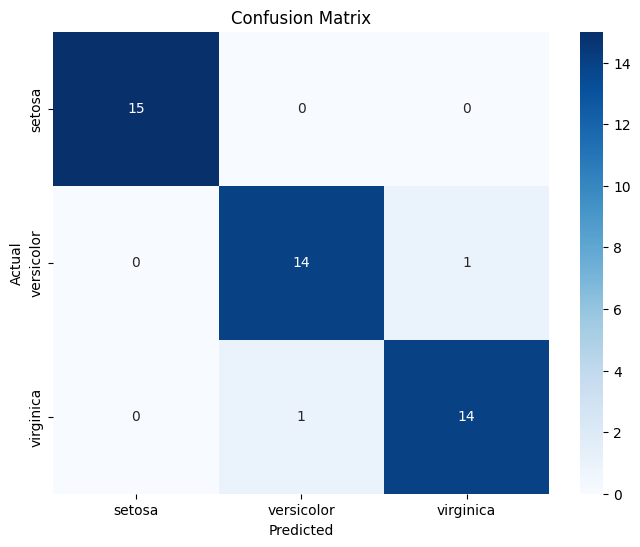

In [1]:

import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load the Iris Dataset ---
# We'll load the classic Iris dataset, which is a collection of measurements of iris flowers, categorized by species.
iris = load_iris()
X = iris.data
y = iris.target

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nFirst 5 rows of features (X):\n", X[:5])
print("\nTarget names:", iris.target_names)

# --- 2. Split Data into Training and Testing Sets ---
# We'll split the dataset into 70% for training and 30% for testing to evaluate the model's performance on unseen data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# --- 3. Train the SVM Classifier ---
# We'll use a Support Vector Classifier (SVC) with a Radial Basis Function (RBF) kernel.
# You can experiment with 'linear', 'poly', 'sigmoid' for the kernel.
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

print("\nSVM Model trained successfully!")

# --- 4. Make Predictions ---
# Now, let's use the trained model to predict the species for the test dataset.
y_pred = svm_model.predict(X_test)

print("\nFirst 10 actual labels (y_test):", y_test[:10])
print("First 10 predicted labels (y_pred):", y_pred[:10])

# --- 5. Evaluate Accuracy and Other Metrics ---
# Finally, we'll evaluate the model's performance using accuracy, a classification report,
# and a confusion matrix.
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#22.Write a Python program to train two SVM classifiers with Linear and RBF kernels on the Wine dataset, then compare their accuracies

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load the Wine Dataset ---
# We'll load the Wine dataset, which contains chemical analysis of wines grown in the same region in Italy but derived from three different cultivars.
wine = load_wine()
X = wine.data
y = wine.target

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nFirst 5 rows of features (X):\n", X[:5])
print("\nTarget names:", wine.target_names)

# --- 2. Split Data into Training and Testing Sets ---
# We'll split the dataset into 80% for training and 20% for testing. This split helps us evaluate how well our models generalize to unseen data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# --- 3. Train and Evaluate SVM with Linear Kernel ---
# First, we'll train an SVM classifier using a `linear` kernel. This is often a good baseline, especially for datasets that are approximately linearly separable.
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

print("\nSVM (Linear Kernel) trained successfully!")
print(f"Accuracy (Linear Kernel): {accuracy_linear:.4f}")
print("\nClassification Report (Linear Kernel):\n", classification_report(y_test, y_pred_linear, target_names=wine.target_names))

# --- 4. Train and Evaluate SVM with RBF Kernel ---
# Next, we'll train an SVM classifier using a Radial Basis Function (`rbf`) kernel. This kernel is very versatile and often performs well with non-linearly separable data by implicitly mapping it to a higher-dimensional space.
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

y_pred_rbf = svm_rbf.predict(X_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print("\nSVM (RBF Kernel) trained successfully!")
print(f"Accuracy (RBF Kernel): {accuracy_rbf:.4f}")
print("\nClassification Report (RBF Kernel):\n", classification_report(y_test, y_pred_rbf, target_names=wine.target_names))

# --- 5. Compare Accuracies ---
# Finally, let's compare the accuracies of both models side-by-side.
print("\n--- Model Accuracy Comparison ---")
print(f"Linear Kernel SVM Accuracy: {accuracy_linear:.4f}")
print(f"RBF Kernel SVM Accuracy:    {accuracy_rbf:.4f}")

if accuracy_linear > accuracy_rbf:
    print("\nThe Linear Kernel SVM performed slightly better on this dataset.")
elif accuracy_rbf > accuracy_linear:
    print("\nThe RBF Kernel SVM performed slightly better on this dataset.")
else:
    print("\nBoth Linear and RBF Kernel SVMs achieved the same accuracy on this dataset.")

Features (X) shape: (178, 13)
Target (y) shape: (178,)

First 5 rows of features (X):
 [[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]

Target names: ['class_0' 'class_1' 'class_2']

X_train shape: (142, 13)
X_test shape: (36, 13)
y_train shape: (142,)
y_test shape: (36,)

SVM (Linear Kernel) trained successfully!
Accuracy (Linear Kernel): 0.9444

Classification Report 

#23.Write a Python program to train an SVM Regressor (SVR) on a housing dataset and evaluate it using Mean Squared Error (MSE)

Features (X) shape: (20640, 8)
Target (y) shape: (20640,)

First 5 rows of features (X):
 [[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]

Target description: .. _california_housing_dataset:

X_train shape: (16512, 8)
X_test shape: (4128, 8)
y_train shape: (16512,)
y_test shape: (4128,)

Features scaled successfully!

SVR Model trained successfully!

First 10 actual values (y_tes

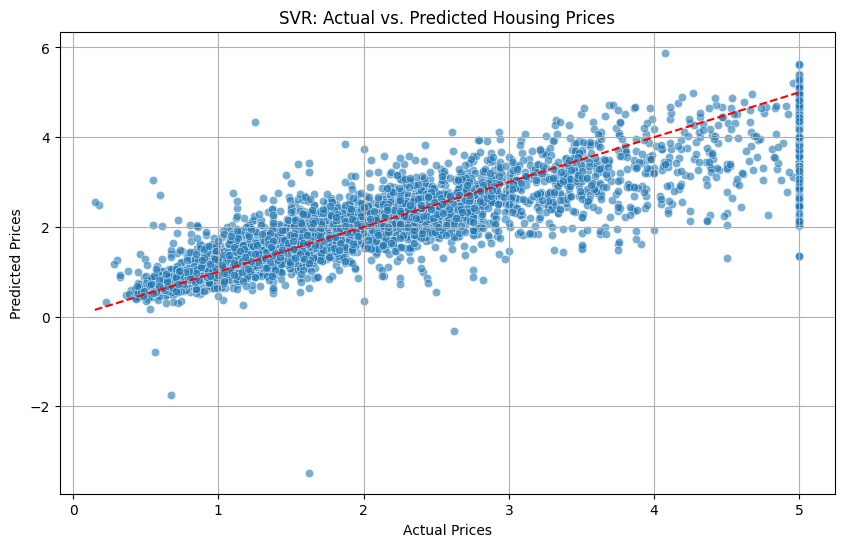

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load the Housing Dataset ---
# We'll use the California Housing dataset for this regression task.
# It contains median house values for California districts.
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nFirst 5 rows of features (X):\n", X[:5])
print("\nTarget description:", california_housing.DESCR.split('\n')[0])

# --- 2. Split Data into Training and Testing Sets ---
# We'll split the dataset into 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# --- 3. Feature Scaling ---
# SVR is sensitive to feature scaling, so it's good practice to scale the data.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled successfully!")

# --- 4. Train the SVR Model ---
# We'll use a Support Vector Regressor (SVR) with a Radial Basis Function (RBF) kernel.
# You can experiment with C, epsilon (tolerance for errors), and gamma (kernel coefficient).
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1, gamma=0.1)
svr_model.fit(X_train_scaled, y_train)

print("\nSVR Model trained successfully!")

# --- 5. Make Predictions ---
# Now, let's use the trained model to predict housing prices for the test dataset.
y_pred = svr_model.predict(X_test_scaled)

print("\nFirst 10 actual values (y_test):", y_test[:10])
print("First 10 predicted values (y_pred):", y_pred[:10])

# --- 6. Evaluate the Model using Mean Squared Error (MSE) ---
# MSE measures the average of the squares of the errors, i.e., the average squared difference
# between the estimated values and what is actually observed.
mse = mean_squared_error(y_test, y_pred)
print(f"\nMean Squared Error (MSE): {mse:.4f}")

# --- Optional: Visualize Predictions vs. Actual ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('SVR: Actual vs. Predicted Housing Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Ideal prediction line
plt.grid(True)
plt.show()

#24. Write a Python program to train an SVM Classifier with a Polynomial Kernel and visualize the decision boundary

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# --- 1. Load the Iris Dataset ---
# We'll use the Iris dataset, but select only two features for easy 2D visualization.
iris = load_iris()
X = iris.data[:, :2] # Using only the first two features: sepal length and sepal width
y = iris.target

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nFirst 5 rows of selected features (X):\n", X[:5])
print("\nTarget names:", iris.target_names)

# --- 2. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# --- 3. Feature Scaling ---
# It's good practice to scale features for SVM, especially with polynomial/RBF kernels.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled successfully!")

# --- 4. Train the SVM Classifier with Polynomial Kernel ---
# We'll use a polynomial kernel. You can experiment with 'degree', 'C', and 'gamma' parameters.
# A common choice for 'degree' is 3.
svm_poly = SVC(kernel='poly', degree=3, C=1, gamma='scale', random_state=42)
svm_poly.fit(X_train_scaled, y_train)

y_pred_poly = svm_poly.predict(X_test_scaled)
accuracy_poly = accuracy_score(y_test, y_pred_poly)

print("\nSVM (Polynomial Kernel) trained successfully!")
print(f"Accuracy (Polynomial Kernel): {accuracy_poly:.4f}")

Features (X) shape: (150, 2)
Target (y) shape: (150,)

First 5 rows of selected features (X):
 [[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]

Target names: ['setosa' 'versicolor' 'virginica']

Features scaled successfully!

SVM (Polynomial Kernel) trained successfully!
Accuracy (Polynomial Kernel): 0.6889


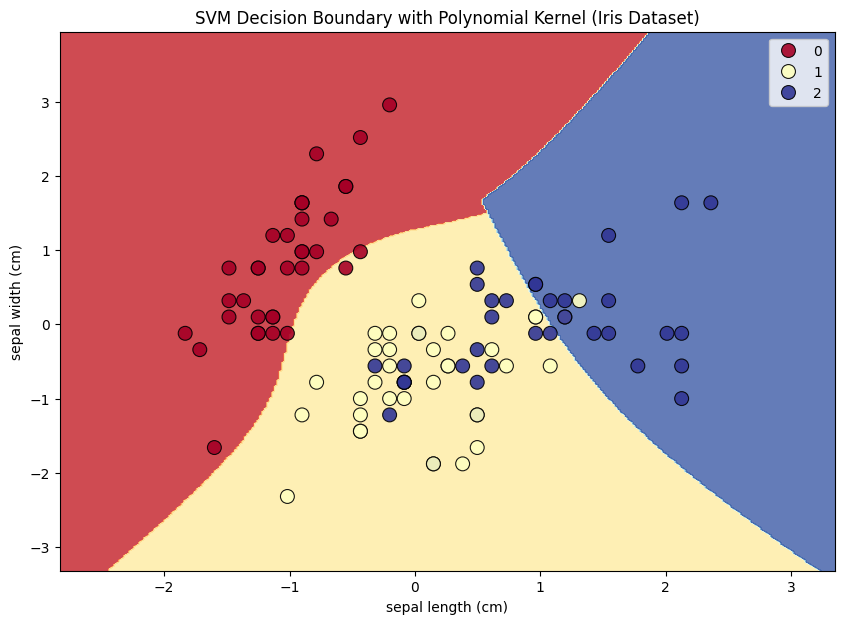

In [5]:
# --- 5. Visualize the Decision Boundary ---

def plot_decision_boundary(X, y, model, title):
    # Define min and max values for the features to create a meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                           np.arange(y_min, y_max, 0.02))

    # Predict the class for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 7))
    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    # Plot the data points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='RdYlBu', s=100, alpha=0.9, edgecolor='k')
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title(title)
    plt.show()

# Visualize the decision boundary of the trained polynomial SVM
# We pass the scaled training data for visualization of the boundary learned on it
plot_decision_boundary(X_train_scaled, y_train, svm_poly, 'SVM Decision Boundary with Polynomial Kernel (Iris Dataset)')

#25.Write a Python program to train a Gaussian Naïve Bayes classifier on the Breast Cancer dataset and evaluate accuracy

Features (X) shape: (569, 30)
Target (y) shape: (569,)

First 5 rows of features (X):
 [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3

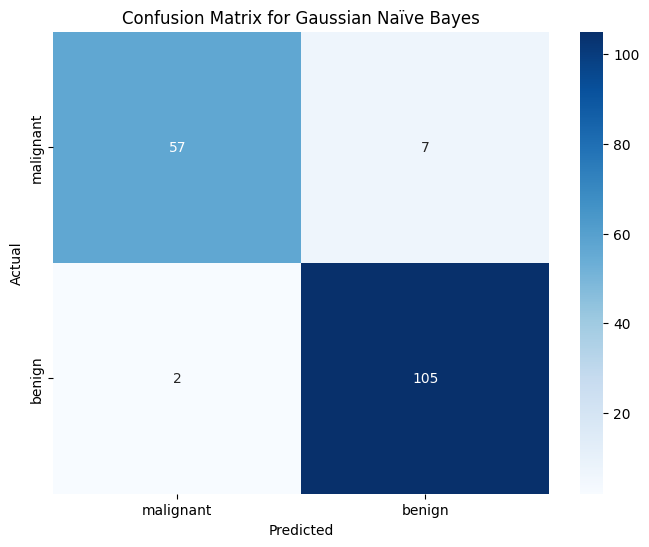

In [6]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load the Breast Cancer Dataset ---
# This dataset is a classic binary classification problem.
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nFirst 5 rows of features (X):\n", X[:5])
print("\nTarget names (0: malignant, 1: benign):", breast_cancer.target_names)

# --- 2. Split Data into Training and Testing Sets ---
# We'll split the dataset into 70% for training and 30% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# --- 3. Train the Gaussian Naïve Bayes Classifier ---
# Gaussian Naïve Bayes is suitable for continuous data, which the Breast Cancer dataset contains.
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("\nGaussian Naïve Bayes Model trained successfully!")

# --- 4. Make Predictions ---
# Now, let's use the trained model to predict the classes for the test dataset.
y_pred = gnb.predict(X_test)

print("\nFirst 10 actual labels (y_test):", y_test[:10])
print("First 10 predicted labels (y_pred):", y_pred[:10])

# --- 5. Evaluate Accuracy and Other Metrics ---
# Evaluate the model's performance using accuracy, a classification report,
# and a confusion matrix.
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=breast_cancer.target_names))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=breast_cancer.target_names, yticklabels=breast_cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gaussian Naïve Bayes')
plt.show()

#26.Write a Python program to train a Multinomial Naïve Bayes classifier for text classification using the 20 Newsgroups dataset.

Number of training documents: 2257
Number of test documents: 1502

First training document (excerpt):
 From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also li ...

Target names: ['alt.atheism', 'comp.graphics', 'sci.med', 'soc.religion.christian']

Shape of X_train_counts (documents x vocabulary size): (2257, 35788)
Shape of X_train_tfidf: (2257, 35788)

Multinomial Naïve Bayes Model trained successfully!

First 10 actual labels (y_test): [2 2 2 0 3 0 1 3 2 2]
First 10 predicted labels (y_pred): [2 2 3 0 3 0 1 3 2 3]

Accuracy: 0.8349

Classification Report:
                         precision    recall  f1-score   support

           alt.atheism       0.97      0.60      0.74       319
         comp.graphics       0.96      0.89      0.92       

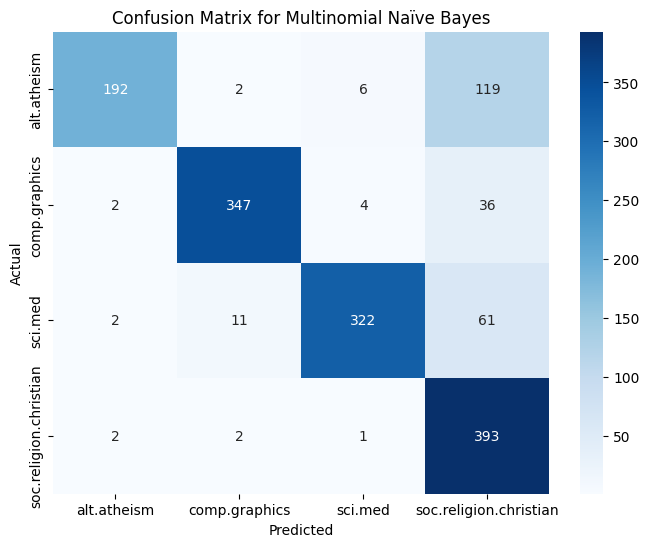

In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load the 20 Newsgroups Dataset ---
# We'll load a subset of categories for simplicity.
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

X_train_raw = newsgroups_train.data
y_train = newsgroups_train.target
X_test_raw = newsgroups_test.data
y_test = newsgroups_test.target

print("Number of training documents:", len(X_train_raw))
print("Number of test documents:", len(X_test_raw))
print("\nFirst training document (excerpt):\n", X_train_raw[0][:300], '...')
print("\nTarget names:", newsgroups_train.target_names)

# --- 2. Convert Text to Feature Vectors (Word Counts) ---
# CountVectorizer converts a collection of text documents to a matrix of token counts.
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train_raw)
X_test_counts = count_vect.transform(X_test_raw)

print("\nShape of X_train_counts (documents x vocabulary size):", X_train_counts.shape)

# --- 3. Apply TF-IDF Transformation ---
# TfidfTransformer transforms a count matrix to a normalized tf-idf representation.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

print("Shape of X_train_tfidf:", X_train_tfidf.shape)

# --- 4. Train the Multinomial Naïve Bayes Classifier ---
# Multinomial Naïve Bayes is well-suited for classification with discrete features (like word counts or TF-IDF).
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)

print("\nMultinomial Naïve Bayes Model trained successfully!")

# --- 5. Make Predictions ---
y_pred = mnb.predict(X_test_tfidf)

print("\nFirst 10 actual labels (y_test):", y_test[:10])
print("First 10 predicted labels (y_pred):", y_pred[:10])

# --- 6. Evaluate Accuracy and Other Metrics ---
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=newsgroups_test.target_names))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=newsgroups_test.target_names, yticklabels=newsgroups_test.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Multinomial Naïve Bayes')
plt.show()

#27.Write a Python program to train an SVM Classifier with different C values and compare the decision boundaries visually

Features (X) shape: (150, 2)
Target (y) shape: (150,)

Target names: ['setosa' 'versicolor' 'virginica']

Features scaled successfully!


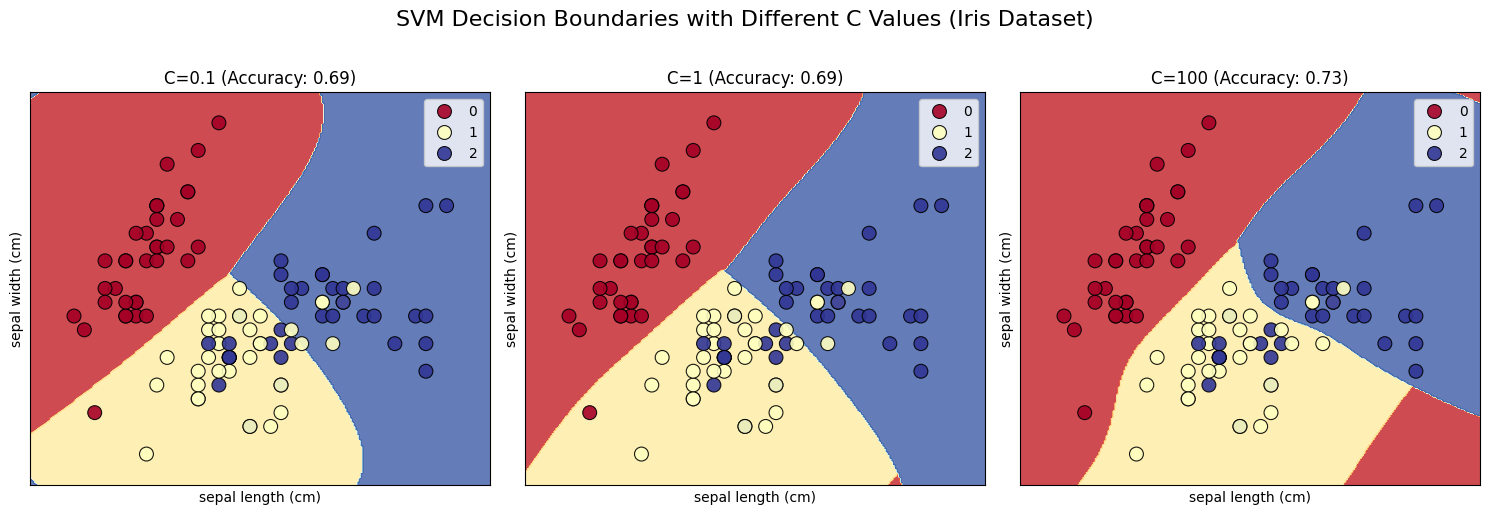

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- 1. Load the Iris Dataset (2 features for visualization) ---
iris = load_iris()
X = iris.data[:, :2]  # Use only the first two features (sepal length and sepal width)
y = iris.target

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nTarget names:", iris.target_names)

# --- 2. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# --- 3. Feature Scaling ---
# Scaling is crucial for SVMs, especially with RBF kernel.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled successfully!")

# --- 4. Define the plotting function ---
def plot_decision_boundary(X, y, model, title, ax):
    # Define min and max values for the features to create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                           np.arange(y_min, y_max, 0.02))

    # Predict the class for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
    # Plot the data points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='RdYlBu', s=100, alpha=0.9, edgecolor='k', ax=ax)
    ax.set_xlabel(iris.feature_names[0])
    ax.set_ylabel(iris.feature_names[1])
    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())

# --- 5. Train SVMs with different C values and visualize decision boundaries ---
C_values = [0.1, 1, 100]
plt.figure(figsize=(15, 5))

for i, C_val in enumerate(C_values):
    ax = plt.subplot(1, len(C_values), i + 1)

    # Train the SVM with RBF kernel (often a good general-purpose kernel)
    svm_model = SVC(kernel='rbf', C=C_val, gamma='scale', random_state=42)
    svm_model.fit(X_train_scaled, y_train)

    # Get accuracy for the current C value
    accuracy = svm_model.score(X_test_scaled, y_test)

    plot_decision_boundary(X_train_scaled, y_train, svm_model, f'C={C_val} (Accuracy: {accuracy:.2f})', ax)

plt.suptitle('SVM Decision Boundaries with Different C Values (Iris Dataset)', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

#28. Write a Python program to train a Bernoulli Naïve Bayes classifier for binary classification on a dataset with binary features

Features (X) shape: (1000, 10)
Target (y) shape: (1000,)

First 5 rows of binary features (X_binary):
 [[0 1 0 1 1 1 0 1 1 1]
 [0 0 0 1 0 1 1 1 1 1]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 1 1 0 1 0 0]
 [0 0 0 0 0 1 0 1 0 1]]

First 5 target labels (y):
 [0 0 1 1 1]

X_train shape: (700, 10)
X_test shape: (300, 10)
y_train shape: (700,)
y_test shape: (300,)

Bernoulli Naïve Bayes Model trained successfully!

First 10 actual labels (y_test): [1 1 1 1 0 1 1 1 1 0]
First 10 predicted labels (y_pred): [1 1 1 1 0 1 1 1 1 0]

Accuracy: 0.9033

Classification Report:
               precision    recall  f1-score   support

     Class 0       0.92      0.88      0.90       149
     Class 1       0.89      0.93      0.91       151

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



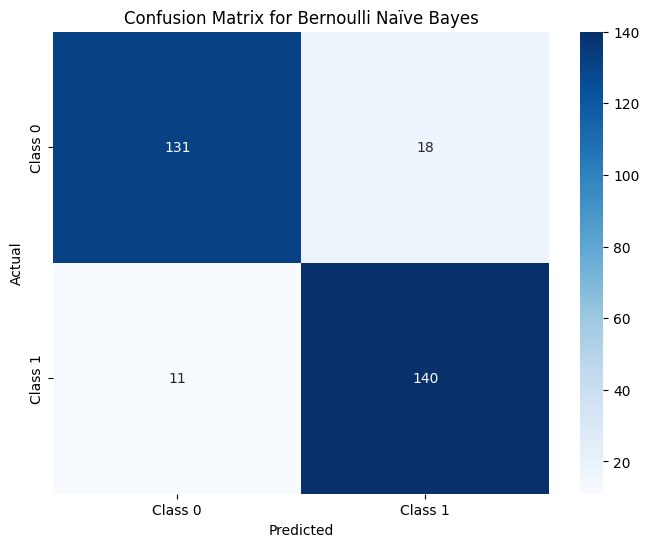

In [9]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Generate a Synthetic Dataset with Binary Features ---
# Bernoulli Naïve Bayes is designed for binary/boolean features.
# We'll create a synthetic dataset where features are 0 or 1.
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=0,
                           n_clusters_per_class=1, random_state=42, n_classes=2)

# Ensure features are binary (0 or 1) by thresholding, though make_classification often produces near-binary features
X_binary = (X > np.mean(X)).astype(int)

print("Features (X) shape:", X_binary.shape)
print("Target (y) shape:", y.shape)
print("\nFirst 5 rows of binary features (X_binary):\n", X_binary[:5])
print("\nFirst 5 target labels (y):\n", y[:5])

# --- 2. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.3, random_state=42, stratify=y)

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# --- 3. Train the Bernoulli Naïve Bayes Classifier ---
# BernoulliNB is specifically for binary features.
bnb = BernoulliNB()
bnb.fit(X_train, y_train)

print("\nBernoulli Naïve Bayes Model trained successfully!")

# --- 4. Make Predictions ---
y_pred = bnb.predict(X_test)

print("\nFirst 10 actual labels (y_test):", y_test[:10])
print("First 10 predicted labels (y_pred):", y_pred[:10])

# --- 5. Evaluate Accuracy and Other Metrics ---
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1']))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Bernoulli Naïve Bayes')
plt.show()

#29. Write a Python program to apply feature scaling before training an SVM model and compare results with unscaled data

In [10]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# --- 1. Load the Iris Dataset ---
iris = load_iris()
X = iris.data
y = iris.target

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nTarget names:", iris.target_names)

# --- 2. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# --- 3. Train SVM on Unscaled Data ---
# Using an RBF kernel, as it's sensitive to feature scales.
svm_unscaled = SVC(kernel='rbf', random_state=42)
svm_unscaled.fit(X_train, y_train)
y_pred_unscaled = svm_unscaled.predict(X_test)
accuracy_unscaled = accuracy_score(y_test, y_pred_unscaled)

print("\n--- SVM on Unscaled Data ---")
print(f"Accuracy (Unscaled Data): {accuracy_unscaled:.4f}")
print("Classification Report (Unscaled Data):\n", classification_report(y_test, y_pred_unscaled, target_names=iris.target_names))

# --- 4. Apply Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled successfully!")
print("First 5 rows of scaled X_train:\n", X_train_scaled[:5])

# --- 5. Train SVM on Scaled Data ---
svm_scaled = SVC(kernel='rbf', random_state=42)
svm_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = svm_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print("\n--- SVM on Scaled Data ---")
print(f"Accuracy (Scaled Data): {accuracy_scaled:.4f}")
print("Classification Report (Scaled Data):\n", classification_report(y_test, y_pred_scaled, target_names=iris.target_names))

# --- 6. Compare Results ---
print("\n--- Comparison ---")
print(f"Accuracy without scaling: {accuracy_unscaled:.4f}")
print(f"Accuracy with scaling:    {accuracy_scaled:.4f}")

if accuracy_scaled > accuracy_unscaled:
    print("\nConclusion: Feature scaling significantly improved the SVM model's accuracy.")
elif accuracy_scaled < accuracy_unscaled:
    print("\nConclusion: Feature scaling led to a slight decrease in accuracy (less common for RBF SVMs).")
else:
    print("\nConclusion: Feature scaling did not change the SVM model's accuracy significantly.")

Features (X) shape: (150, 4)
Target (y) shape: (150,)

Target names: ['setosa' 'versicolor' 'virginica']

X_train shape: (105, 4)
X_test shape: (45, 4)

--- SVM on Unscaled Data ---
Accuracy (Unscaled Data): 0.9556
Classification Report (Unscaled Data):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.93      0.93      0.93        15
   virginica       0.93      0.93      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45


Features scaled successfully!
First 5 rows of scaled X_train:
 [[-0.90045861 -1.22024754 -0.4419858  -0.13661044]
 [ 0.38036614 -1.87955796  0.40282929  0.38029394]
 [-0.90045861  1.63676428 -1.2868009  -1.17041921]
 [ 1.07899781  0.31814344  1.19132338  1.41410271]
 [-0.20182693 -0.56093712  0.17754527  0.12184175]]

--- SVM on Scaled Data ---
Accuracy (Scaled

#30. Write a Python program to train a Gaussian Naïve Bayes model and compare the predictions before and after Laplace Smoothing

In [11]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# --- 1. Load a Text Dataset ---
# We'll use a very small subset of the 20 Newsgroups dataset to make the zero-frequency problem more likely.
categories = ['alt.atheism', 'comp.graphics'] # Using only two categories for simplicity

# Fetch training data
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
X_train_raw = newsgroups_train.data
y_train = newsgroups_train.target

# Fetch test data
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)
X_test_raw = newsgroups_test.data
y_test = newsgroups_test.target

print("Number of training documents:", len(X_train_raw))
print("Number of test documents:", len(X_test_raw))
print("Target names:", newsgroups_train.target_names)

# --- 2. Convert Text to Feature Vectors (Word Counts) ---
# We will use CountVectorizer to get word counts. We'll use a small vocabulary to emphasize the effect of smoothing.
vectorizer = CountVectorizer(max_features=5000) # Limit vocabulary size for demonstration
X_train_counts = vectorizer.fit_transform(X_train_raw)
X_test_counts = vectorizer.transform(X_test_raw)

print("\nShape of X_train_counts:", X_train_counts.shape)
print("Shape of X_test_counts:", X_test_counts.shape)

# --- 3. Train MultinomialNB WITHOUT Laplace Smoothing (alpha=0) ---
# Setting alpha=0 means no smoothing. This can lead to zero probabilities.
mnb_no_smoothing = MultinomialNB(alpha=0.0)
mnb_no_smoothing.fit(X_train_counts, y_train)

# --- 4. Train MultinomialNB WITH Laplace Smoothing (default alpha=1) ---
# Default alpha is 1 (Laplace smoothing).
mnb_with_smoothing = MultinomialNB(alpha=1.0) # Explicitly set alpha=1, which is the default
mnb_with_smoothing.fit(X_train_counts, y_train)

print("\nMultinomial Naïve Bayes Models trained successfully (with and without smoothing)!")

# --- 5. Make Predictions and Evaluate ---

# Predictions without smoothing
y_pred_no_smoothing = mnb_no_smoothing.predict(X_test_counts)
accuracy_no_smoothing = accuracy_score(y_test, y_pred_no_smoothing)
print(f"\nAccuracy (No Smoothing): {accuracy_no_smoothing:.4f}")
print("Classification Report (No Smoothing):\n",
      classification_report(y_test, y_pred_no_smoothing, target_names=newsgroups_test.target_names))

# Predictions with smoothing
y_pred_with_smoothing = mnb_with_smoothing.predict(X_test_counts)
accuracy_with_smoothing = accuracy_score(y_test, y_pred_with_smoothing)
print(f"\nAccuracy (With Smoothing): {accuracy_with_smoothing:.4f}")
print("Classification Report (With Smoothing):\n",
      classification_report(y_test, y_pred_with_smoothing, target_names=newsgroups_test.target_names))

# --- 6. Compare Probabilities and Identify Differences ---
print("\n--- Comparing Probabilities and Predictions ---")

# Find an example document where predictions might differ or where smoothing has an impact
# We will look for documents with words that are rare in one class but common in another.

# Let's manually check a document where smoothing might make a difference
# For illustrative purposes, we'll pick a document that is classified differently.
diff_indices = np.where(y_pred_no_smoothing != y_pred_with_smoothing)[0]

if len(diff_indices) > 0:
    example_idx = diff_indices[0]
    print(f"\nExample document at index {example_idx} where predictions differ:")
    print("Actual Label:", newsgroups_test.target_names[y_test[example_idx]])
    print("Predicted (No Smoothing):", newsgroups_test.target_names[y_pred_no_smoothing[example_idx]])
    print("Predicted (With Smoothing):", newsgroups_test.target_names[y_pred_with_smoothing[example_idx]])
    print("\nOriginal Document (excerpt):\n", X_test_raw[example_idx][:500], '...')

    # Display log-probabilities for this document for both models
    log_proba_no_smoothing = mnb_no_smoothing.predict_log_proba(X_test_counts[example_idx])
    log_proba_with_smoothing = mnb_with_smoothing.predict_log_proba(X_test_counts[example_idx])

    print("\nLog-probabilities (No Smoothing):")
    for i, prob in enumerate(log_proba_no_smoothing[0]):
        print(f"  {newsgroups_train.target_names[i]}: {prob:.4f}")

    print("\nLog-probabilities (With Smoothing):")
    for i, prob in enumerate(log_proba_with_smoothing[0]):
        print(f"  {newsgroups_train.target_names[i]}: {prob:.4f}")
else:
    print("\nNo documents found where predictions differ significantly with/without smoothing on this subset.")
    print("This might happen if the dataset is already well-behaved or differences are subtle.")

Number of training documents: 1064
Number of test documents: 708
Target names: ['alt.atheism', 'comp.graphics']

Shape of X_train_counts: (1064, 5000)
Shape of X_test_counts: (708, 5000)

Multinomial Naïve Bayes Models trained successfully (with and without smoothing)!

Accuracy (No Smoothing): 0.8263
Classification Report (No Smoothing):
                precision    recall  f1-score   support

  alt.atheism       0.72      0.99      0.84       319
comp.graphics       0.99      0.69      0.81       389

     accuracy                           0.83       708
    macro avg       0.86      0.84      0.83       708
 weighted avg       0.87      0.83      0.82       708


Accuracy (With Smoothing): 0.9816
Classification Report (With Smoothing):
                precision    recall  f1-score   support

  alt.atheism       0.97      0.99      0.98       319
comp.graphics       0.99      0.98      0.98       389

     accuracy                           0.98       708
    macro avg       0.98   

/usr/local/lib/python3.12/dist-packages/sklearn/naive_bayes.py:898: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(
/usr/local/lib/python3.12/dist-packages/sklearn/naive_bayes.py:130: RuntimeWarning: invalid value encountered in subtract
  return jll - np.atleast_2d(log_prob_x).T


#31.Write a Python program to train an SVM Classifier and use GridSearchCV to tune the hyperparameters (C, gamma, kernel)

In [12]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# --- 1. Load the Iris Dataset ---
iris = load_iris()
X = iris.data
y = iris.target

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nTarget names:", iris.target_names)

# --- 2. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# --- 3. Feature Scaling ---
# Scaling is crucial for SVMs, especially with RBF and polynomial kernels.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled successfully!")

# --- 4. Define the SVM model and parameter grid for GridSearchCV ---
# The SVC estimator itself
svm = SVC(random_state=42)

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto', 0.01, 0.1, 1], # Kernel coefficient for 'rbf', 'poly', 'sigmoid'
    'kernel': ['rbf', 'poly', 'linear'] # Type of kernel function
}

# --- 5. Perform GridSearchCV ---
# GridSearchCV will perform an exhaustive search over specified parameter values for an estimator.
# It's using 5-fold cross-validation by default (cv=None, which defaults to 5-fold if estimator is a classifier)
# verbose=3 provides more output during the search.
# n_jobs=-1 uses all available processors.
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)

print("\nStarting GridSearchCV...")
grid_search.fit(X_train_scaled, y_train)
print("GridSearchCV completed!")

# --- 6. Get the Best Parameters and Best Score ---
print("\nBest parameters found by GridSearchCV:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

# --- 7. Evaluate the Best Estimator on the Test Set ---
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the best SVM on the test set: {accuracy:.4f}")
print("\nClassification Report of the best SVM:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

Features (X) shape: (150, 4)
Target (y) shape: (150,)

Target names: ['setosa' 'versicolor' 'virginica']

X_train shape: (105, 4)
X_test shape: (45, 4)

Features scaled successfully!

Starting GridSearchCV...
Fitting 5 folds for each of 60 candidates, totalling 300 fits
GridSearchCV completed!

Best parameters found by GridSearchCV: {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation accuracy: 0.980952380952381

Accuracy of the best SVM on the test set: 0.9111

Classification Report of the best SVM:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.86        15

    accuracy                           0.91        45
   macro avg       0.92      0.91      0.91        45
weighted avg       0.92      0.91      0.91        45



#32.Write a Python program to train an SVM Classifier on an imbalanced dataset and apply class weighting and check it improve accuracy

Features (X) shape: (1000, 2)
Target (y) shape: (1000,)

Class distribution:
Class 0: 900 samples
Class 1: 100 samples


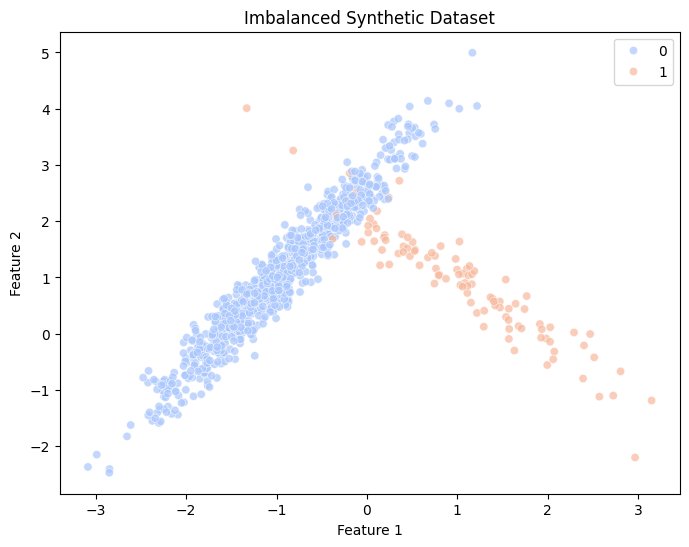


X_train shape: (700, 2)
X_test shape: (300, 2)

Features scaled successfully!

--- Training SVM WITHOUT Class Weighting ---
Accuracy (Unweighted SVM): 0.9967
Classification Report (Unweighted SVM):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       270
           1       1.00      0.97      0.98        30

    accuracy                           1.00       300
   macro avg       1.00      0.98      0.99       300
weighted avg       1.00      1.00      1.00       300


--- Training SVM WITH Class Weighting (balanced) ---
Accuracy (Weighted SVM): 0.9933
Classification Report (Weighted SVM):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       270
           1       0.97      0.97      0.97        30

    accuracy                           0.99       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.99      0.99      0.99       300


--- Comparison of SV

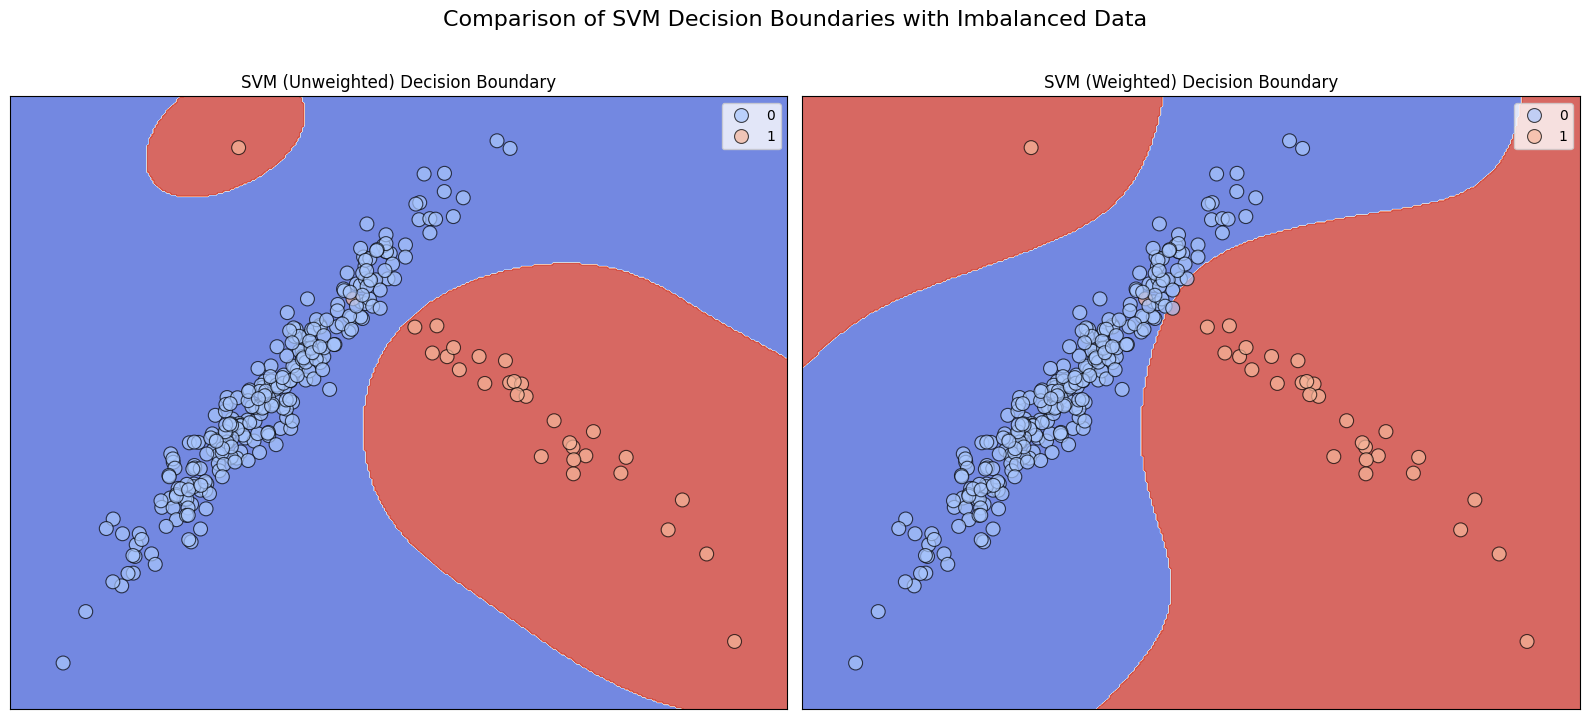

In [13]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Generate an Imbalanced Dataset ---
# We'll create a synthetic dataset with 90% of class 0 and 10% of class 1.
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0,
                           n_repeated=0, n_classes=2, n_clusters_per_class=1, weights=[0.90, 0.10],
                           flip_y=0, random_state=42)

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nClass distribution:")
unique, counts = np.unique(y, return_counts=True)
for u, c in zip(unique, counts):
    print(f"Class {u}: {c} samples")

# Visualize the imbalanced dataset
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', alpha=0.7)
plt.title('Imbalanced Synthetic Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# --- 2. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# --- 3. Feature Scaling ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled successfully!")

# --- 4. Train SVM Classifier WITHOUT Class Weighting ---
print("\n--- Training SVM WITHOUT Class Weighting ---")
svm_unweighted = SVC(kernel='rbf', random_state=42)
svm_unweighted.fit(X_train_scaled, y_train)
y_pred_unweighted = svm_unweighted.predict(X_test_scaled)

accuracy_unweighted = accuracy_score(y_test, y_pred_unweighted)
print(f"Accuracy (Unweighted SVM): {accuracy_unweighted:.4f}")
print("Classification Report (Unweighted SVM):\n", classification_report(y_test, y_pred_unweighted))

# --- 5. Train SVM Classifier WITH Class Weighting ---
print("\n--- Training SVM WITH Class Weighting (balanced) ---")
# 'balanced' mode automatically adjusts weights inversely proportional to class frequencies
svm_weighted = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_weighted.fit(X_train_scaled, y_train)
y_pred_weighted = svm_weighted.predict(X_test_scaled)

accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
print(f"Accuracy (Weighted SVM): {accuracy_weighted:.4f}")
print("Classification Report (Weighted SVM):\n", classification_report(y_test, y_pred_weighted))

# --- 6. Compare Results and Visualize Decision Boundaries ---
print("\n--- Comparison of SVMs with and without Class Weighting ---")
print(f"Unweighted SVM Accuracy: {accuracy_unweighted:.4f}")
print(f"Weighted SVM Accuracy:   {accuracy_weighted:.4f}")

def plot_decision_boundary(X, y, model, title, ax):
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                           np.arange(y_min, y_max, 0.02))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', s=100, alpha=0.7, edgecolor='k', ax=ax)
    ax.set_title(title)
    ax.set_xticks(())
    ax.set_yticks(())

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
plot_decision_boundary(X_test_scaled, y_test, svm_unweighted, 'SVM (Unweighted) Decision Boundary', axes[0])
plot_decision_boundary(X_test_scaled, y_test, svm_weighted, 'SVM (Weighted) Decision Boundary', axes[1])
plt.suptitle('Comparison of SVM Decision Boundaries with Imbalanced Data', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

#33.Write a Python program to implement a Naïve Bayes classifier for spam detection using email data

Number of training documents: 1130
Number of test documents: 753

Training data label distribution:
 label
0.0    584
1.0    546
Name: count, dtype: int64

Test data label distribution:
 label
0.0    389
1.0    364
Name: count, dtype: int64

First training document (excerpt, label 0.0):
 Does ANYONE out there in Net-land have any information on the Cobra 2.20 
card?  The sticker on the end of the card reads
        Model: Cobra 1-B-1
        Bios:  Cobra v2.20

I Havn't been able to find anything about it from anyone!  If you have 
any information on how to get a hold of the company ...

Shape of X_train_tfidf (documents x vocabulary size): (1130, 10000)
Shape of X_test_tfidf: (753, 10000)

Multinomial Naïve Bayes Classifier trained successfully!

First 10 actual labels (0=Ham, 1=Spam): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
First 10 predicted labels (0=Ham, 1=Spam): [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

Accuracy: 0.9495

Classification Report:
               precision    recall  f1-score   suppor

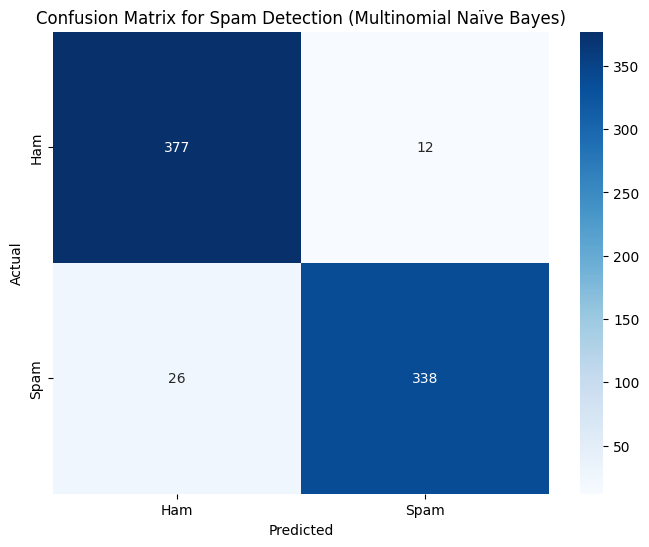

In [15]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load Data for Spam/Ham Simulation ---
# We'll use two distinct categories from 20 Newsgroups to simulate spam and non-spam (ham).
# For example, 'comp.graphics' could be considered 'ham' and 'talk.politics.mideast' could be 'spam' (or any contrasting pair).
# The choice here is illustrative, as true spam detection involves specific spam datasets.
spam_categories = ['talk.politics.guns'] # Example: treat this category as 'spam'
ham_categories = ['comp.graphics']      # Example: treat this category as 'ham'

# Fetch training data for selected categories
# Filter out headers, footers, and quotes to get cleaner text
newsgroups_train_spam = fetch_20newsgroups(subset='train', categories=spam_categories,
                                         remove=('headers', 'footers', 'quotes'), shuffle=True, random_state=42)
newsgroups_train_ham = fetch_20newsgroups(subset='train', categories=ham_categories,
                                        remove=('headers', 'footers', 'quotes'), shuffle=True, random_state=42)

# Combine data and assign labels (0 for ham, 1 for spam)
X_train_spam = newsgroups_train_spam.data
y_train_spam = np.ones(len(X_train_spam)) # Label as 1 (spam)
X_train_ham = newsgroups_train_ham.data
y_train_ham = np.zeros(len(X_train_ham)) # Label as 0 (ham)

X_train_raw = X_train_ham + X_train_spam
y_train = np.concatenate((y_train_ham, y_train_spam))

# Fetch test data similarly
newsgroups_test_spam = fetch_20newsgroups(subset='test', categories=spam_categories,
                                        remove=('headers', 'footers', 'quotes'), shuffle=True, random_state=42)
newsgroups_test_ham = fetch_20newsgroups(subset='test', categories=ham_categories,
                                       remove=('headers', 'footers', 'quotes'), shuffle=True, random_state=42)

X_test_spam = newsgroups_test_spam.data
y_test_spam = np.ones(len(X_test_spam))
X_test_ham = newsgroups_test_ham.data
y_test_ham = np.zeros(len(X_test_ham))

X_test_raw = X_test_ham + X_test_spam
y_test = np.concatenate((y_test_ham, y_test_spam))

# Create a DataFrame for better inspection
data_df_train = pd.DataFrame({'text': X_train_raw, 'label': y_train})
data_df_test = pd.DataFrame({'text': X_test_raw, 'label': y_test})

print("Number of training documents:", len(data_df_train))
print("Number of test documents:", len(data_df_test))
print("\nTraining data label distribution:\n", data_df_train['label'].value_counts())
print("\nTest data label distribution:\n", data_df_test['label'].value_counts())
print("\nFirst training document (excerpt, label {:}):\n".format(data_df_train['label'][0]), data_df_train['text'][0][:300], '...')

# --- 2. Convert Text to Feature Vectors (TF-IDF) ---
# Using TfidfVectorizer combines CountVectorizer and TfidfTransformer
# TfidfVectorizer is often preferred for text classification as it weighs words by their importance.
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=10000) # Limit features for efficiency

X_train_tfidf = tfidf_vectorizer.fit_transform(data_df_train['text'])
X_test_tfidf = tfidf_vectorizer.transform(data_df_test['text'])

print("\nShape of X_train_tfidf (documents x vocabulary size):", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)

# --- 3. Train the Multinomial Naïve Bayes Classifier ---
# Multinomial Naïve Bayes is highly effective for text classification.
mnb_classifier = MultinomialNB()
mnb_classifier.fit(X_train_tfidf, data_df_train['label'])

print("\nMultinomial Naïve Bayes Classifier trained successfully!")

# --- 4. Make Predictions ---
y_pred = mnb_classifier.predict(X_test_tfidf)

print("\nFirst 10 actual labels (0=Ham, 1=Spam):", data_df_test['label'][:10].values)
print("First 10 predicted labels (0=Ham, 1=Spam):", y_pred[:10])

# --- 5. Evaluate Accuracy and Other Metrics ---
accuracy = accuracy_score(data_df_test['label'], y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

print("\nClassification Report:\n", classification_report(data_df_test['label'], y_pred, target_names=['Ham', 'Spam']))

cm = confusion_matrix(data_df_test['label'], y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Spam Detection (Multinomial Naïve Bayes)')
plt.show()

#34. Write a Python program to train an SVM Classifier and a Naïve Bayes Classifier on the same dataset and compare their accuracy

In [16]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# --- 1. Load the Iris Dataset ---
iris = load_iris()
X = iris.data
y = iris.target

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nTarget names:", iris.target_names)

# --- 2. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# --- 3. Feature Scaling (for SVM) ---
# SVMs are sensitive to feature scaling, especially with RBF/polynomial kernels.
# Naïve Bayes models are generally less sensitive, but scaling doesn't harm.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled successfully for SVM!")

# --- 4. Train SVM Classifier ---
print("\n--- Training SVM Classifier ---")
svm_model = SVC(kernel='rbf', random_state=42) # Using RBF kernel as it's common and performs well
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Accuracy (SVM): {accuracy_svm:.4f}")
print("Classification Report (SVM):\n", classification_report(y_test, y_pred_svm, target_names=iris.target_names))

# --- 5. Train Gaussian Naïve Bayes Classifier ---
print("\n--- Training Gaussian Naïve Bayes Classifier ---")
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train) # Naïve Bayes usually doesn't require scaled data
y_pred_gnb = gnb_model.predict(X_test)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)

print(f"Accuracy (Gaussian Naïve Bayes): {accuracy_gnb:.4f}")
print("Classification Report (Gaussian Naïve Bayes):\n", classification_report(y_test, y_pred_gnb, target_names=iris.target_names))

# --- 6. Compare Accuracies ---
print("\n--- Model Accuracy Comparison ---")
print(f"SVM Classifier Accuracy:             {accuracy_svm:.4f}")
print(f"Gaussian Naïve Bayes Classifier Accuracy: {accuracy_gnb:.4f}")

if accuracy_svm > accuracy_gnb:
    print("\nConclusion: SVM Classifier performed better on this dataset.")
elif accuracy_gnb > accuracy_svm:
    print("\nConclusion: Gaussian Naïve Bayes Classifier performed better on this dataset.")
else:
    print("\nConclusion: Both classifiers achieved the same accuracy on this dataset.")

Features (X) shape: (150, 4)
Target (y) shape: (150,)

Target names: ['setosa' 'versicolor' 'virginica']

X_train shape: (105, 4)
X_test shape: (45, 4)

Features scaled successfully for SVM!

--- Training SVM Classifier ---
Accuracy (SVM): 0.9333
Classification Report (SVM):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45


--- Training Gaussian Naïve Bayes Classifier ---
Accuracy (Gaussian Naïve Bayes): 0.9111
Classification Report (Gaussian Naïve Bayes):
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.82      0.93      0.88        15
   virginica       0.92      0.80      0.8

#35.Write a Python program to perform feature selection before training a Naïve Bayes classifier and compare result

In [17]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load the Breast Cancer Dataset ---
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
feature_names = breast_cancer.feature_names

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nFirst 5 rows of features (X):\n", X[:5])
print("\nTarget names (0: malignant, 1: benign):", breast_cancer.target_names)

# --- 2. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# --- 3. Train Gaussian Naïve Bayes WITHOUT Feature Selection ---
print("\n--- Training Gaussian Naïve Bayes WITHOUT Feature Selection ---")
gnb_full = GaussianNB()
gnb_full.fit(X_train, y_train)
y_pred_full = gnb_full.predict(X_test)
accuracy_full = accuracy_score(y_test, y_pred_full)

print(f"Accuracy (Full Features): {accuracy_full:.4f}")
print("Classification Report (Full Features):\n", classification_report(y_test, y_pred_full, target_names=breast_cancer.target_names))

# --- 4. Perform Feature Selection using SelectKBest ---
# We'll select the top K features based on F-statistic (ANOVA).
# Let's try to select, for example, the top 10 features.
k = 10
selector = SelectKBest(f_classif, k=k)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

selected_features_indices = selector.get_support(indices=True)
selected_feature_names = feature_names[selected_features_indices]

print(f"\nSelected {k} Features: {selected_feature_names}")
print("X_train_selected shape:", X_train_selected.shape)

# --- 5. Train Gaussian Naïve Bayes WITH Feature Selection ---
print("\n--- Training Gaussian Naïve Bayes WITH Feature Selection ---")
gnb_selected = GaussianNB()
gnb_selected.fit(X_train_selected, y_train)
y_pred_selected = gnb_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)

print(f"Accuracy (Selected Features): {accuracy_selected:.4f}")
print("Classification Report (Selected Features):\n", classification_report(y_test, y_pred_selected, target_names=breast_cancer.target_names))

# --- 6. Compare Accuracies ---
print("\n--- Model Accuracy Comparison ---")
print(f"Gaussian Naïve Bayes (Full Features) Accuracy:     {accuracy_full:.4f}")
print(f"Gaussian Naïve Bayes (Selected Features) Accuracy: {accuracy_selected:.4f}")

if accuracy_selected > accuracy_full:
    print("\nConclusion: Feature selection improved the Naïve Bayes model's accuracy.")
elif accuracy_selected < accuracy_full:
    print("\nConclusion: Feature selection led to a slight decrease in the Naïve Bayes model's accuracy.")
else:
    print("\nConclusion: Feature selection did not change the Naïve Bayes model's accuracy significantly.")

Features (X) shape: (569, 30)
Target (y) shape: (569,)

First 5 rows of features (X):
 [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3

#36. Write a Python program to train an SVM Classifier using One-vs-Rest (OvR) and One-vs-One (OvO) strategies on the Wine dataset and compare their accuracy

In [18]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# --- 1. Load the Wine Dataset ---
wine = load_wine()
X = wine.data
y = wine.target

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nTarget names:", wine.target_names)

# --- 2. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# --- 3. Feature Scaling ---
# Scaling is important for SVMs.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled successfully!")

# --- 4. Train SVM Classifier with One-vs-Rest (OvR) strategy ---
print("\n--- Training SVM Classifier with One-vs-Rest (OvR) ---")
# For multi-class classification, SVC defaults to OvO, but we can explicitly set it to 'ovr'
svm_ovr = SVC(kernel='rbf', decision_function_shape='ovr', random_state=42)
svm_ovr.fit(X_train_scaled, y_train)
y_pred_ovr = svm_ovr.predict(X_test_scaled)
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)

print(f"Accuracy (OvR SVM): {accuracy_ovr:.4f}")
print("Classification Report (OvR SVM):\n", classification_report(y_test, y_pred_ovr, target_names=wine.target_names))

# --- 5. Train SVM Classifier with One-vs-One (OvO) strategy ---
print("\n--- Training SVM Classifier with One-vs-One (OvO) ---")
# SVC uses 'ovo' by default for multi-class classification, but we set it explicitly here.
svm_ovo = SVC(kernel='rbf', decision_function_shape='ovo', random_state=42)
svm_ovo.fit(X_train_scaled, y_train)
y_pred_ovo = svm_ovo.predict(X_test_scaled)
accuracy_ovo = accuracy_score(y_test, y_pred_ovo)

print(f"Accuracy (OvO SVM): {accuracy_ovo:.4f}")
print("Classification Report (OvO SVM):\n", classification_report(y_test, y_pred_ovo, target_names=wine.target_names))

# --- 6. Compare Accuracies ---
print("\n--- Model Accuracy Comparison ---")
print(f"SVM (One-vs-Rest) Accuracy: {accuracy_ovr:.4f}")
print(f"SVM (One-vs-One) Accuracy:  {accuracy_ovo:.4f}")

if accuracy_ovr > accuracy_ovo:
    print("\nConclusion: One-vs-Rest SVM performed better on this dataset.")
elif accuracy_ovo > accuracy_ovr:
    print("\nConclusion: One-vs-One SVM performed better on this dataset.")
else:
    print("\nConclusion: Both OvR and OvO SVMs achieved the same accuracy on this dataset.")

Features (X) shape: (178, 13)
Target (y) shape: (178,)

Target names: ['class_0' 'class_1' 'class_2']

X_train shape: (124, 13)
X_test shape: (54, 13)

Features scaled successfully!

--- Training SVM Classifier with One-vs-Rest (OvR) ---
Accuracy (OvR SVM): 0.9815
Classification Report (OvR SVM):
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       0.95      1.00      0.98        21
     class_2       1.00      0.93      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54


--- Training SVM Classifier with One-vs-One (OvO) ---
Accuracy (OvO SVM): 0.9815
Classification Report (OvO SVM):
               precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        18
     class_1       0.95      1.00      0.98        21
     class_2       1.00      0.93      0.

#37 Write a Python program to train an SVM Classifier using Linear, Polynomial, and RBF kernels on the Breast Cancer dataset and compare their accuracy

In [19]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# --- 1. Load the Breast Cancer Dataset ---
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nTarget names (0: malignant, 1: benign):", breast_cancer.target_names)

# --- 2. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# --- 3. Feature Scaling ---
# Scaling is crucial for SVMs, especially with RBF and polynomial kernels.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled successfully!")

# --- 4. Train and Evaluate SVM with Linear Kernel ---
print("\n--- Training SVM with Linear Kernel ---")
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)
y_pred_linear = svm_linear.predict(X_test_scaled)
accuracy_linear = accuracy_score(y_test, y_pred_linear)

print(f"Accuracy (Linear Kernel): {accuracy_linear:.4f}")
print("Classification Report (Linear Kernel):\n", classification_report(y_test, y_pred_linear, target_names=breast_cancer.target_names))

# --- 5. Train and Evaluate SVM with Polynomial Kernel ---
print("\n--- Training SVM with Polynomial Kernel ---")
# Degree can be adjusted, a common choice is 3.
svm_poly = SVC(kernel='poly', degree=3, gamma='scale', random_state=42)
svm_poly.fit(X_train_scaled, y_train)
y_pred_poly = svm_poly.predict(X_test_scaled)
accuracy_poly = accuracy_score(y_test, y_pred_poly)

print(f"Accuracy (Polynomial Kernel): {accuracy_poly:.4f}")
print("Classification Report (Polynomial Kernel):\n", classification_report(y_test, y_pred_poly, target_names=breast_cancer.target_names))

# --- 6. Train and Evaluate SVM with RBF Kernel ---
print("\n--- Training SVM with RBF Kernel ---")
# Gamma can be adjusted, 'scale' is a good default.
svm_rbf = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)
y_pred_rbf = svm_rbf.predict(X_test_scaled)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

print(f"Accuracy (RBF Kernel): {accuracy_rbf:.4f}")
print("Classification Report (RBF Kernel):\n", classification_report(y_test, y_pred_rbf, target_names=breast_cancer.target_names))

# --- 7. Compare Accuracies ---
print("\n--- Model Accuracy Comparison ---")
print(f"Linear Kernel SVM Accuracy:     {accuracy_linear:.4f}")
print(f"Polynomial Kernel SVM Accuracy: {accuracy_poly:.4f}")
print(f"RBF Kernel SVM Accuracy:        {accuracy_rbf:.4f}")

accuracies = {'Linear': accuracy_linear, 'Polynomial': accuracy_poly, 'RBF': accuracy_rbf}
best_kernel = max(accuracies, key=accuracies.get)
print(f"\nConclusion: The {best_kernel} Kernel SVM performed best on this dataset.")

Features (X) shape: (569, 30)
Target (y) shape: (569,)

Target names (0: malignant, 1: benign): ['malignant' 'benign']

X_train shape: (398, 30)
X_test shape: (171, 30)

Features scaled successfully!

--- Training SVM with Linear Kernel ---
Accuracy (Linear Kernel): 0.9825
Classification Report (Linear Kernel):
               precision    recall  f1-score   support

   malignant       0.98      0.97      0.98        64
      benign       0.98      0.99      0.99       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171


--- Training SVM with Polynomial Kernel ---
Accuracy (Polynomial Kernel): 0.8947
Classification Report (Polynomial Kernel):
               precision    recall  f1-score   support

   malignant       1.00      0.72      0.84        64
      benign       0.86      1.00      0.92       107

    accuracy                           0.89       171
   macro avg   

#38. Write a Python program to train an SVM Classifier using Stratified K-Fold Cross-Validation and compute the average accuracy

In [20]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# --- 1. Load the Breast Cancer Dataset ---
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nTarget names (0: malignant, 1: benign):", breast_cancer.target_names)

# --- 2. Feature Scaling ---
# Scaling is crucial for SVMs.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("\nFeatures scaled successfully!")

# --- 3. Initialize SVM Classifier ---
svm_model = SVC(kernel='rbf', random_state=42)

# --- 4. Set up Stratified K-Fold Cross-Validation ---
n_splits = 5 # Number of folds
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

accuracies = []

print(f"\nStarting Stratified K-Fold Cross-Validation with {n_splits} splits...")

# --- 5. Perform Cross-Validation ---
for fold, (train_index, test_index) in enumerate(skf.split(X_scaled, y)):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the SVM model on the current fold
    svm_model.fit(X_train, y_train)

    # Make predictions on the test set of the current fold
    y_pred = svm_model.predict(X_test)

    # Calculate accuracy for the current fold
    fold_accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(fold_accuracy)

    print(f"Fold {fold + 1} Accuracy: {fold_accuracy:.4f}")

# --- 6. Compute Average Accuracy ---
average_accuracy = np.mean(accuracies)
std_dev_accuracy = np.std(accuracies)

print("\n--- Cross-Validation Results ---")
print(f"All Fold Accuracies: {accuracies}")
print(f"Average Accuracy: {average_accuracy:.4f}")
print(f"Standard Deviation of Accuracy: {std_dev_accuracy:.4f}")

print("\nConclusion: The SVM Classifier's performance was evaluated using Stratified K-Fold Cross-Validation.")

Features (X) shape: (569, 30)
Target (y) shape: (569,)

Target names (0: malignant, 1: benign): ['malignant' 'benign']

Features scaled successfully!

Starting Stratified K-Fold Cross-Validation with 5 splits...
Fold 1 Accuracy: 0.9912
Fold 2 Accuracy: 0.9386
Fold 3 Accuracy: 0.9737
Fold 4 Accuracy: 0.9912
Fold 5 Accuracy: 0.9823

--- Cross-Validation Results ---
All Fold Accuracies: [0.9912280701754386, 0.9385964912280702, 0.9736842105263158, 0.9912280701754386, 0.9823008849557522]
Average Accuracy: 0.9754
Standard Deviation of Accuracy: 0.0195

Conclusion: The SVM Classifier's performance was evaluated using Stratified K-Fold Cross-Validation.


#39. Write a Python program to train a Naïve Bayes classifier using different prior probabilities and compare performance

Features (X) shape: (569, 30)
Target (y) shape: (569,)

Target names (0: malignant, 1: benign): ['malignant' 'benign']

X_train shape: (398, 30)
X_test shape: (171, 30)
y_train shape: (398,)
y_test shape: (171,)

Actual training class priors: [0.3718593 0.6281407]

--- Training Gaussian Naïve Bayes with Default Priors (learned from data) ---
Accuracy (Default Priors): 0.9474
Classification Report (Default Priors):
               precision    recall  f1-score   support

   malignant       0.97      0.89      0.93        64
      benign       0.94      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171


Custom priors used: [0.7 0.3]

--- Training Gaussian Naïve Bayes with Custom Priors ---
Accuracy (Custom Priors): 0.9357
Classification Report (Custom Priors):
               precision    recall  f1-score   support

   malignant       0.93      0.89    

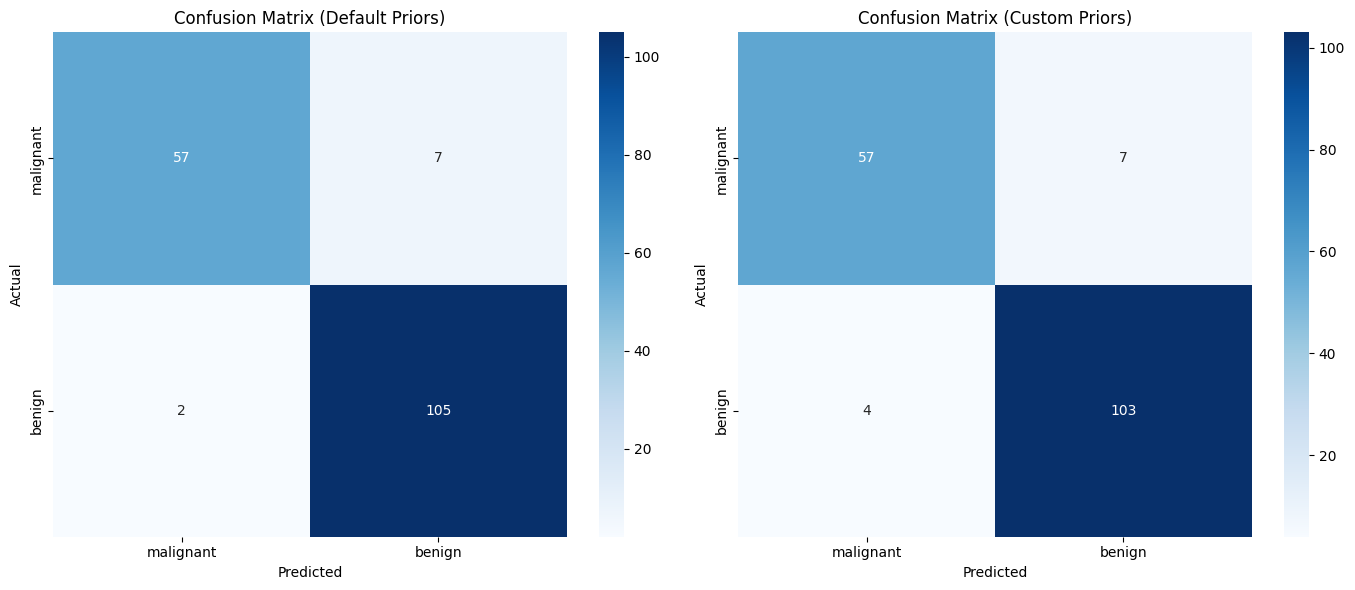

In [21]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load the Breast Cancer Dataset ---
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nTarget names (0: malignant, 1: benign):", breast_cancer.target_names)

# --- 2. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Calculate actual class priors from the training data
unique_classes, class_counts = np.unique(y_train, return_counts=True)
training_priors = class_counts / len(y_train)
print(f"\nActual training class priors: {training_priors}")

# --- 3. Train Gaussian Naïve Bayes with default (learned) priors ---
print("\n--- Training Gaussian Naïve Bayes with Default Priors (learned from data) ---")
gnb_default = GaussianNB()
gnb_default.fit(X_train, y_train)
y_pred_default = gnb_default.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)

print(f"Accuracy (Default Priors): {accuracy_default:.4f}")
print("Classification Report (Default Priors):\n",
      classification_report(y_test, y_pred_default, target_names=breast_cancer.target_names))

# --- 4. Train Gaussian Naïve Bayes with custom (biased) priors ---
# Let's create custom priors that are different from the observed training priors.
# For example, let's artificially increase the prior for class 0 (malignant)
# This is done to demonstrate the effect, usually you'd set priors based on domain knowledge.
custom_priors = np.array([0.7, 0.3]) # Giving higher prior to class 0, lower to class 1
# Ensure custom_priors sum to 1
custom_priors = custom_priors / np.sum(custom_priors)

print(f"\nCustom priors used: {custom_priors}")
print("\n--- Training Gaussian Naïve Bayes with Custom Priors ---")
gnb_custom = GaussianNB(priors=custom_priors)
gnb_custom.fit(X_train, y_train)
y_pred_custom = gnb_custom.predict(X_test)
accuracy_custom = accuracy_score(y_test, y_pred_custom)

print(f"Accuracy (Custom Priors): {accuracy_custom:.4f}")
print("Classification Report (Custom Priors):\n",
      classification_report(y_test, y_pred_custom, target_names=breast_cancer.target_names))

# --- 5. Compare Results ---
print("\n--- Comparison of Naïve Bayes Models with Different Priors ---")
print(f"Accuracy (Default Priors): {accuracy_default:.4f}")
print(f"Accuracy (Custom Priors):  {accuracy_custom:.4f}")

if accuracy_custom > accuracy_default:
    print("\nConclusion: Custom priors led to a slight improvement in accuracy on this dataset.")
elif accuracy_custom < accuracy_default:
    print("\nConclusion: Custom priors led to a slight decrease in accuracy on this dataset.")
else:
    print("\nConclusion: Custom priors did not change the accuracy significantly on this dataset.")

# --- Optional: Visualize Confusion Matrices for comparison ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(confusion_matrix(y_test, y_pred_default), annot=True, fmt='d', cmap='Blues',
            xticklabels=breast_cancer.target_names, yticklabels=breast_cancer.target_names, ax=axes[0])
axes[0].set_title('Confusion Matrix (Default Priors)')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

sns.heatmap(confusion_matrix(y_test, y_pred_custom), annot=True, fmt='d', cmap='Blues',
            xticklabels=breast_cancer.target_names, yticklabels=breast_cancer.target_names, ax=axes[1])
axes[1].set_title('Confusion Matrix (Custom Priors)')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

#40. Write a Python program to perform Recursive Feature Elimination (RFE) before training an SVM Classifier and compare accuracy

In [22]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

# --- 1. Load the Breast Cancer Dataset ---
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target
feature_names = breast_cancer.feature_names

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nFirst 5 rows of features (X):\n", X[:5])
print("\nTarget names (0: malignant, 1: benign):", breast_cancer.target_names)

# --- 2. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# --- 3. Feature Scaling ---
# Scaling is crucial for SVMs.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled successfully!")

# --- 4. Train SVM Classifier WITHOUT Feature Selection (Baseline) ---
print("\n--- Training SVM WITHOUT Feature Selection (Baseline) ---")
svm_full = SVC(kernel='linear', random_state=42) # Using linear kernel as RFE typically works well with linear models
svm_full.fit(X_train_scaled, y_train)
y_pred_full = svm_full.predict(X_test_scaled)
accuracy_full = accuracy_score(y_test, y_pred_full)

print(f"Accuracy (Full Features): {accuracy_full:.4f}")
print("Classification Report (Full Features):\n", classification_report(y_test, y_pred_full, target_names=breast_cancer.target_names))

# --- 5. Perform Recursive Feature Elimination (RFE) ---
# We'll select the top K features. The 'estimator' for RFE is crucial, here we use SVC with linear kernel.
estimator_rfe = SVC(kernel='linear', random_state=42)
# Let's try to select, for example, 10 features.
rfe_selector = RFE(estimator=estimator_rfe, n_features_to_select=10, step=1, verbose=0)
rfe_selector.fit(X_train_scaled, y_train)

X_train_selected = rfe_selector.transform(X_train_scaled)
X_test_selected = rfe_selector.transform(X_test_scaled)

selected_features_mask = rfe_selector.get_support()
selected_feature_names = feature_names[selected_features_mask]

print(f"\nSelected Features by RFE ({rfe_selector.n_features_to_select} features): {selected_feature_names}")
print("X_train_selected shape:", X_train_selected.shape)

# --- 6. Train SVM Classifier WITH Feature Selection ---
print("\n--- Training SVM WITH Feature Selection (RFE) ---")
svm_selected = SVC(kernel='linear', random_state=42)
svm_selected.fit(X_train_selected, y_train)
y_pred_selected = svm_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)

print(f"Accuracy (Selected Features by RFE): {accuracy_selected:.4f}")
print("Classification Report (Selected Features by RFE):\n", classification_report(y_test, y_pred_selected, target_names=breast_cancer.target_names))

# --- 7. Compare Accuracies ---
print("\n--- Model Accuracy Comparison ---")
print(f"SVM (Full Features) Accuracy:          {accuracy_full:.4f}")
print(f"SVM (RFE Selected Features) Accuracy: {accuracy_selected:.4f}")

if accuracy_selected > accuracy_full:
    print("\nConclusion: RFE feature selection improved the SVM model's accuracy.")
elif accuracy_selected < accuracy_full:
    print("\nConclusion: RFE feature selection led to a slight decrease in the SVM model's accuracy.")
else:
    print("\nConclusion: RFE feature selection did not change the SVM model's accuracy significantly.")

Features (X) shape: (569, 30)
Target (y) shape: (569,)

First 5 rows of features (X):
 [[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3

#41.Write a Python program to train an SVM Classifier and evaluate its performance using Precision, Recall, and F1-Score instead of accuracy

Features (X) shape: (569, 30)
Target (y) shape: (569,)

Target names (0: malignant, 1: benign): ['malignant' 'benign']

X_train shape: (398, 30)
X_test shape: (171, 30)

Features scaled successfully!

SVM Model trained successfully!

--- Model Performance Evaluation ---
Classification Report:
               precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        64
      benign       0.98      0.98      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



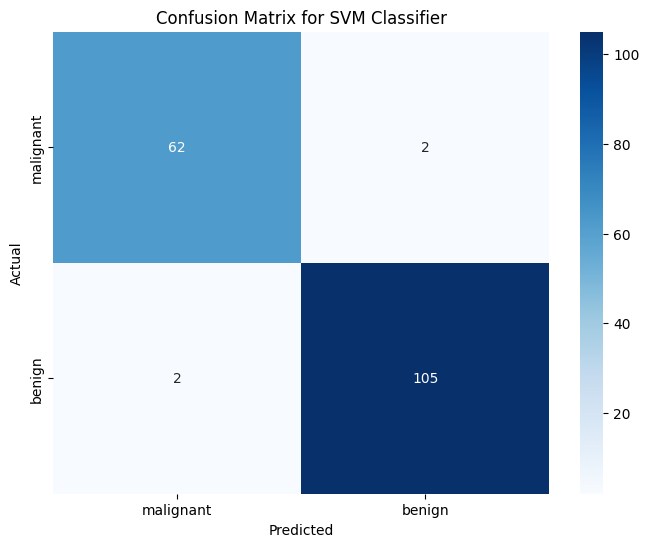

In [23]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load the Breast Cancer Dataset ---
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nTarget names (0: malignant, 1: benign):", breast_cancer.target_names)

# --- 2. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# --- 3. Feature Scaling ---
# Scaling is crucial for SVMs, especially with RBF and polynomial kernels.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled successfully!")

# --- 4. Train the SVM Classifier ---
# Using an RBF kernel, which is a good general-purpose choice.
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

print("\nSVM Model trained successfully!")

# --- 5. Make Predictions ---
y_pred = svm_model.predict(X_test_scaled)

# --- 6. Evaluate Performance using Precision, Recall, and F1-Score ---
print("\n--- Model Performance Evaluation ---")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=breast_cancer.target_names))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=breast_cancer.target_names, yticklabels=breast_cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

#42. Write a Python program to train a Naïve Bayes Classifier and evaluate its performance using Log Loss (Cross-Entropy Loss)

Features (X) shape: (569, 30)
Target (y) shape: (569,)

Target names (0: malignant, 1: benign): ['malignant' 'benign']

X_train shape: (398, 30)
X_test shape: (171, 30)

Gaussian Naïve Bayes Model trained successfully!

First 10 actual labels (y_test): [0 1 1 0 0 0 1 0 1 0]
First 10 predicted labels (hard): [0 1 1 0 1 0 1 0 1 0]
First 10 predicted probabilities (class 0, class 1):
 [[1.     0.    ]
 [0.     1.    ]
 [0.     1.    ]
 [1.     0.    ]
 [0.0165 0.9835]
 [1.     0.    ]
 [0.     1.    ]
 [1.     0.    ]
 [0.     1.    ]
 [1.     0.    ]]

Accuracy: 0.9474
Log Loss (Cross-Entropy Loss): 0.3382

Classification Report:
               precision    recall  f1-score   support

   malignant       0.97      0.89      0.93        64
      benign       0.94      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



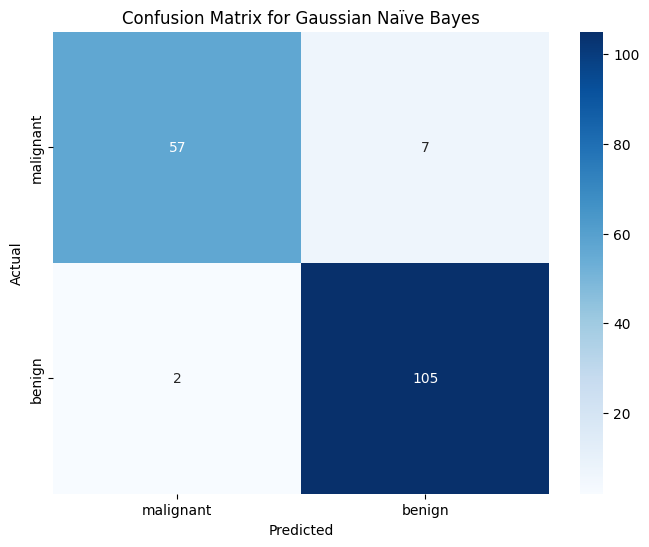

In [24]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load the Breast Cancer Dataset ---
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nTarget names (0: malignant, 1: benign):", breast_cancer.target_names)

# --- 2. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# --- 3. Train the Gaussian Naïve Bayes Classifier ---
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

print("\nGaussian Naïve Bayes Model trained successfully!")

# --- 4. Make Predictions (Hard Labels and Probabilities) ---
y_pred_hard = gnb_model.predict(X_test)
y_pred_proba = gnb_model.predict_proba(X_test)

print("\nFirst 10 actual labels (y_test):", y_test[:10])
print("First 10 predicted labels (hard):", y_pred_hard[:10])
print("First 10 predicted probabilities (class 0, class 1):\n", np.round(y_pred_proba[:10], 4))

# --- 5. Evaluate Performance using Log Loss and Accuracy ---
accuracy = accuracy_score(y_test, y_pred_hard)
logloss = log_loss(y_test, y_pred_proba)

print(f"\nAccuracy: {accuracy:.4f}")
print(f"Log Loss (Cross-Entropy Loss): {logloss:.4f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred_hard, target_names=breast_cancer.target_names))

cm = confusion_matrix(y_test, y_pred_hard)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=breast_cancer.target_names, yticklabels=breast_cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gaussian Naïve Bayes')
plt.show()

#43. Write a Python program to train an SVM Classifier and visualize the Confusion Matrix using seaborn

Features (X) shape: (569, 30)
Target (y) shape: (569,)

Target names (0: malignant, 1: benign): ['malignant' 'benign']

X_train shape: (398, 30)
X_test shape: (171, 30)

Features scaled successfully!

SVM Model trained successfully!


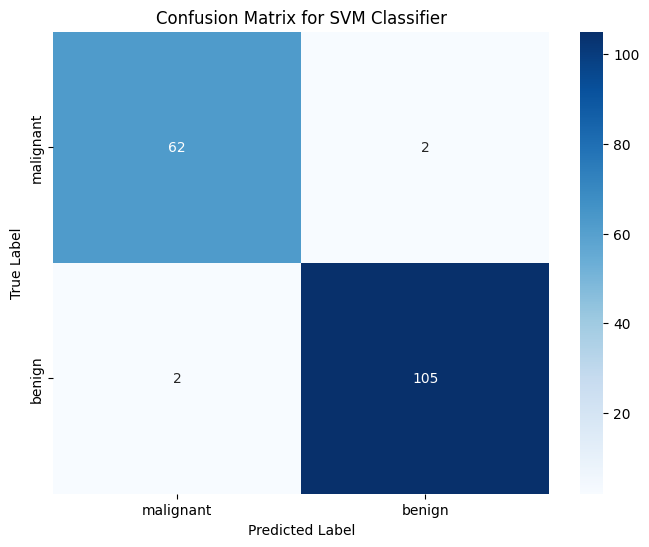


--- Other Evaluation Metrics ---
Accuracy: 0.9766
Classification Report:
               precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        64
      benign       0.98      0.98      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [25]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load the Breast Cancer Dataset ---
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nTarget names (0: malignant, 1: benign):", breast_cancer.target_names)

# --- 2. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# --- 3. Feature Scaling ---
# Scaling is crucial for SVMs, especially with RBF and polynomial kernels.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled successfully!")

# --- 4. Train the SVM Classifier ---
# Using an RBF kernel, which is a good general-purpose choice.
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)

print("\nSVM Model trained successfully!")

# --- 5. Make Predictions ---
y_pred = svm_model.predict(X_test_scaled)

# --- 6. Visualize the Confusion Matrix using Seaborn ---
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=breast_cancer.target_names, yticklabels=breast_cancer.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()

# --- Optional: Print other evaluation metrics ---
print("\n--- Other Evaluation Metrics ---")
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=breast_cancer.target_names))

#44.Write a Python program to train an SVM Regressor (SVR) and evaluate its performance using Mean Absolute Error (MAE) instead of MSE

Features (X) shape: (20640, 8)
Target (y) shape: (20640,)

First 5 rows of features (X):
 [[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]

Target description: .. _california_housing_dataset:

X_train shape: (16512, 8)
X_test shape: (4128, 8)
y_train shape: (16512,)
y_test shape: (4128,)

Features scaled successfully!

SVR Model trained successfully!

First 10 actual values (y_tes

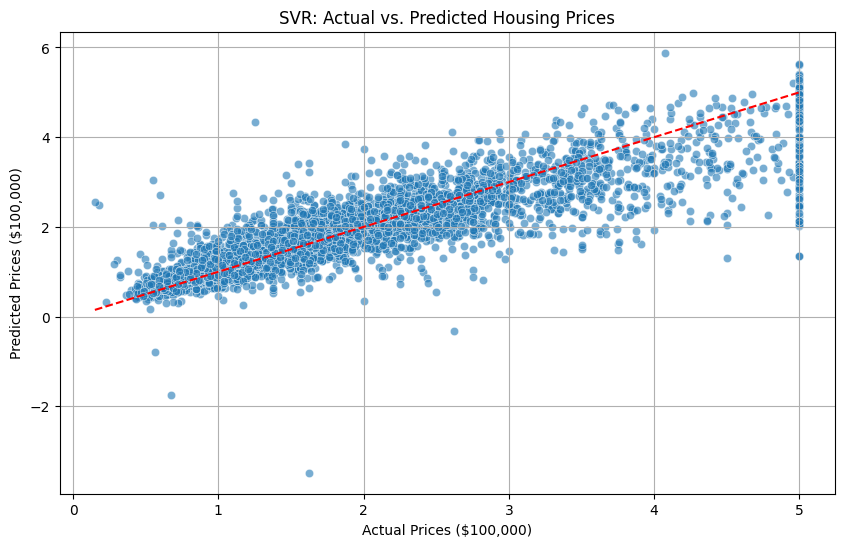

In [26]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load the Housing Dataset ---
# We'll use the California Housing dataset for this regression task.
# It contains median house values for California districts.
california_housing = fetch_california_housing()
X = california_housing.data
y = california_housing.target

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nFirst 5 rows of features (X):\n", X[:5])
print("\nTarget description:", california_housing.DESCR.split('\n')[0])

# --- 2. Split Data into Training and Testing Sets ---
# We'll split the dataset into 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# --- 3. Feature Scaling ---
# SVR is sensitive to feature scaling, so it's good practice to scale the data.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled successfully!")

# --- 4. Train the SVR Model ---
# We'll use a Support Vector Regressor (SVR) with a Radial Basis Function (RBF) kernel.
# You can experiment with C, epsilon (tolerance for errors), and gamma (kernel coefficient).
svr_model = SVR(kernel='rbf', C=100, epsilon=0.1, gamma=0.1) # Adjusted parameters for better performance
svr_model.fit(X_train_scaled, y_train)

print("\nSVR Model trained successfully!")

# --- 5. Make Predictions ---
# Now, let's use the trained model to predict housing prices for the test dataset.
y_pred = svr_model.predict(X_test_scaled)

print("\nFirst 10 actual values (y_test):", y_test[:10])
print("First 10 predicted values (y_pred):", y_pred[:10])

# --- 6. Evaluate the Model using Mean Absolute Error (MAE) ---
# MAE measures the average of the absolute differences between predictions and actual values.
mae = mean_absolute_error(y_test, y_pred)
print(f"\nMean Absolute Error (MAE): {mae:.4f}")

# --- Optional: Visualize Predictions vs. Actual ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Actual Prices ($100,000)')
plt.ylabel('Predicted Prices ($100,000)')
plt.title('SVR: Actual vs. Predicted Housing Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Ideal prediction line
plt.grid(True)
plt.show()

#45.Write a Python program to train a Naïve Bayes classifier and evaluate its performance using the ROC-AUC score

Features (X) shape: (569, 30)
Target (y) shape: (569,)

Target names (0: malignant, 1: benign): ['malignant' 'benign']

X_train shape: (398, 30)
X_test shape: (171, 30)

Gaussian Naïve Bayes Model trained successfully!

First 10 actual labels (y_test): [0 1 1 0 0 0 1 0 1 0]
First 10 predicted probabilities (positive class): [0.     1.     1.     0.     0.9835 0.     1.     0.     1.     0.    ]

ROC-AUC Score: 0.9901


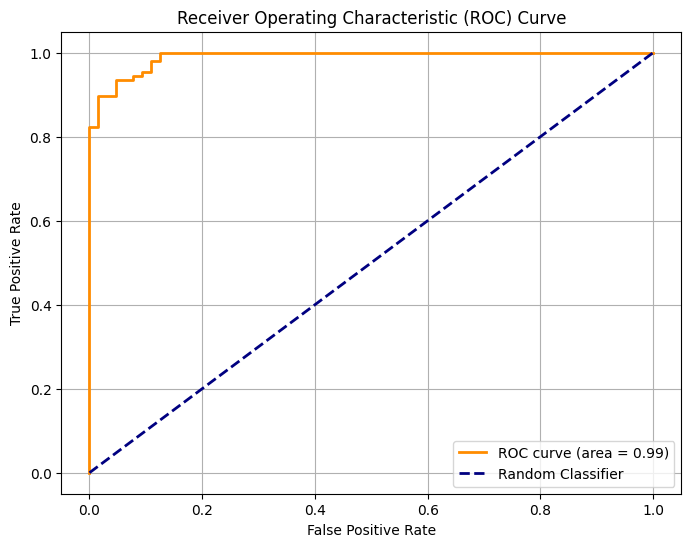


Accuracy: 0.9474
Classification Report:
               precision    recall  f1-score   support

   malignant       0.97      0.89      0.93        64
      benign       0.94      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



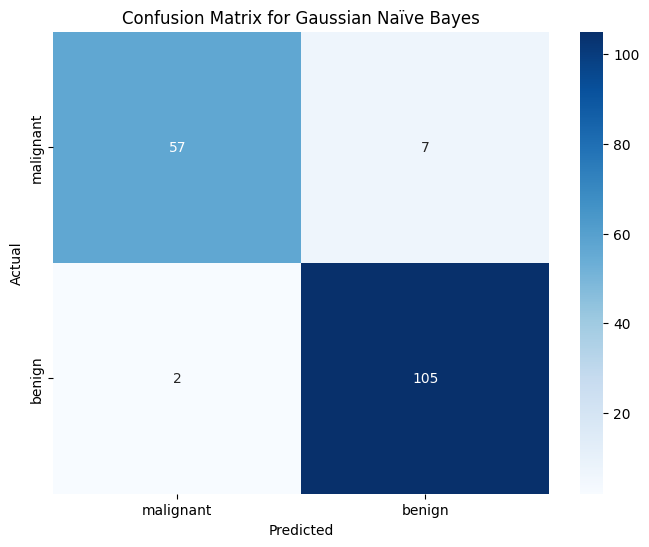

In [27]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load the Breast Cancer Dataset ---
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nTarget names (0: malignant, 1: benign):", breast_cancer.target_names)

# --- 2. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# --- 3. Train the Gaussian Naïve Bayes Classifier ---
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

print("\nGaussian Naïve Bayes Model trained successfully!")

# --- 4. Make Predictions (Hard Labels and Probabilities) ---
# ROC-AUC requires probability estimates for the positive class.
y_pred_proba = gnb_model.predict_proba(X_test)[:, 1] # Probability of the positive class (class 1: benign)
y_pred_hard = gnb_model.predict(X_test)

print("\nFirst 10 actual labels (y_test):", y_test[:10])
print("First 10 predicted probabilities (positive class):", np.round(y_pred_proba[:10], 4))

# --- 5. Evaluate Performance using ROC-AUC Score ---
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC-AUC Score: {roc_auc:.4f}")

# --- 6. Plot ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# --- Optional: Also print Accuracy and Classification Report for context ---
accuracy = accuracy_score(y_test, y_pred_hard)
print(f"\nAccuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_hard, target_names=breast_cancer.target_names))

cm = confusion_matrix(y_test, y_pred_hard)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=breast_cancer.target_names, yticklabels=breast_cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gaussian Naïve Bayes')
plt.show()

#46.Write a Python program to train an SVM Classifier and visualize the Precision-Recall Curve

Features (X) shape: (569, 30)
Target (y) shape: (569,)

Target names (0: malignant, 1: benign): ['malignant' 'benign']

X_train shape: (398, 30)
X_test shape: (171, 30)

Features scaled successfully!

SVM Model trained successfully!

Average Precision Score: 0.9987


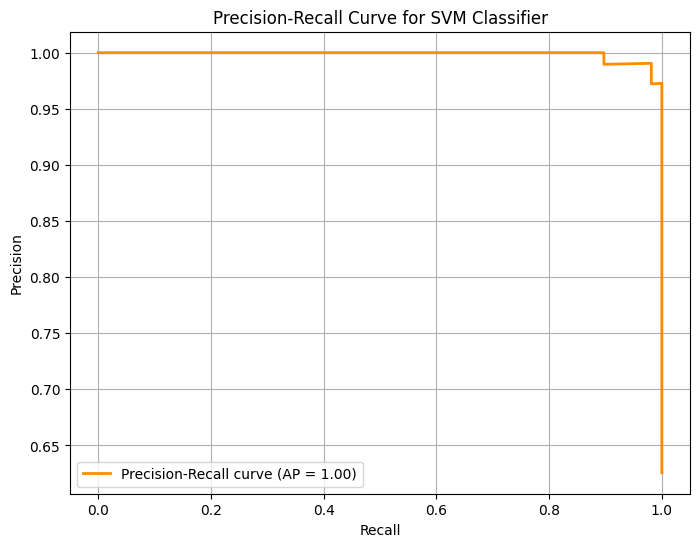


Accuracy: 0.9766
Classification Report:
               precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        64
      benign       0.98      0.98      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



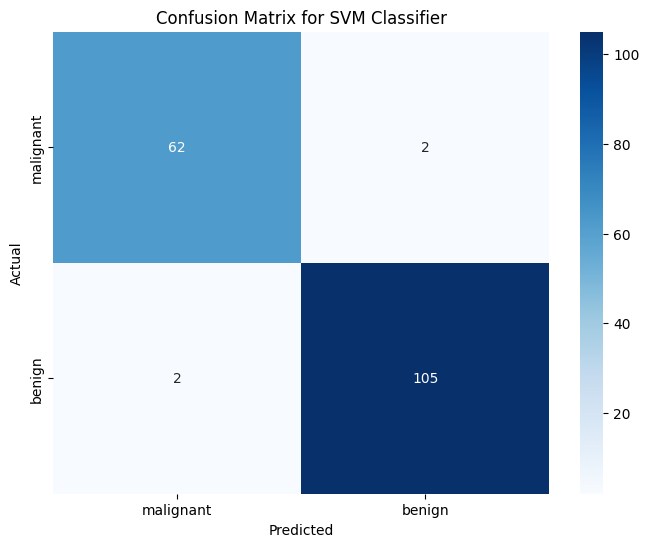

In [31]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load the Breast Cancer Dataset ---
breast_cancer = load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)
print("\nTarget names (0: malignant, 1: benign):", breast_cancer.target_names)

# --- 2. Split Data into Training and Testing Sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("\nX_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# --- 3. Feature Scaling ---
# Scaling is crucial for SVMs.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nFeatures scaled successfully!")

# --- 4. Train the SVM Classifier ---
# For Precision-Recall curve, we need decision scores or probabilities.
# SVC's decision_function provides these scores.
svm_model = SVC(kernel='rbf', random_state=42, probability=True) # Set probability=True to enable predict_proba
svm_model.fit(X_train_scaled, y_train)

print("\nSVM Model trained successfully!")

# --- 5. Get Prediction Probabilities (or decision scores) ---
y_scores = svm_model.predict_proba(X_test_scaled)[:, 1] # Probability of the positive class (class 1: benign)

# --- 6. Calculate Precision-Recall Curve and Average Precision Score ---
precision, recall, _ = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

print(f"\nAverage Precision Score: {avg_precision:.4f}")

# --- 7. Visualize the Precision-Recall Curve ---
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'Precision-Recall curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for SVM Classifier')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# --- Optional: Print other evaluation metrics for context ---
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_hard = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_hard)
print(f"\nAccuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_hard, target_names=breast_cancer.target_names))

cm = confusion_matrix(y_test, y_pred_hard)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=breast_cancer.target_names, yticklabels=breast_cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM Classifier')
plt.show()